# Setup and Context

### Introduction

On November 27, 1895, Alfred Nobel signed his last will in Paris. When it was opened after his death, the will caused a lot of controversy, as Nobel had left much of his wealth for the establishment of a prize.

Alfred Nobel dictates that his entire remaining estate should be used to endow “prizes to those who, during the preceding year, have conferred the greatest benefit to humankind”.

Every year the Nobel Prize is given to scientists and scholars in the categories chemistry, literature, physics, physiology or medicine, economics, and peace. 

<img src=https://i.imgur.com/36pCx5Q.jpg>

Let's see what patterns we can find in the data of the past Nobel laureates. What can we learn about the Nobel prize and our world more generally?

### Upgrade plotly (only Google Colab Notebook)

Google Colab may not be running the latest version of plotly. If you're working in Google Colab, uncomment the line below, run the cell, and restart your notebook server. 

In [1]:
# %pip install --upgrade plotly

### Import Statements

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.dates as mdates

### Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

### Notebook Formatting & Style Helpers

In [4]:
years = mdates.YearLocator()
months = mdates.MonthLocator()
year_fmt = mdates.DateFormatter('%Y')

### Read the Data

In [5]:
df_data = pd.read_csv('nobel_prize_data.csv')
df_data

year    category                                           prize  \
0    1901   Chemistry               The Nobel Prize in Chemistry 1901   
1    1901  Literature              The Nobel Prize in Literature 1901   
2    1901    Medicine  The Nobel Prize in Physiology or Medicine 1901   
3    1901       Peace                      The Nobel Peace Prize 1901   
4    1901       Peace                      The Nobel Peace Prize 1901   
..    ...         ...                                             ...   
957  2020    Medicine  The Nobel Prize in Physiology or Medicine 2020   
958  2020       Peace                      The Nobel Peace Prize 2020   
959  2020     Physics                 The Nobel Prize in Physics 2020   
960  2020     Physics                 The Nobel Prize in Physics 2020   
961  2020     Physics                 The Nobel Prize in Physics 2020   

                                            motivation prize_share  \
0    "in recognition of the extraordinary services ...         1/1   
1    "in special recognition of his poetic composit...         1/1   
2    "for his work on serum therapy, especially its...         1/1   
3                                                  NaN         1/2   
4                                                  NaN         1/2   
..                                                 ...         ...   
957           “for the discovery of Hepatitis C virus”         1/3   
958  “for its efforts to combat hunger, for its con...         1/1   
959  “for the discovery of a supermassive compact o...         1/4   
960  “for the discovery of a supermassive compact o...         1/4   
961  “for the discovery that black hole formation i...         1/2   

    laureate_type                     full_name  birth_date  \
0      Individual  Jacobus Henricus van 't Hoff  1852-08-30   
1      Individual               Sully Prudhomme  1839-03-16   
2      Individual        Emil Adolf von Behring  1854-03-15   
3      Individual                Frédéric Passy  1822-05-20   
4      Individual             Jean Henry Dunant  1828-05-08   
..            ...                           ...         ...   
957    Individual              Michael Houghton  1949-07-02   
958  Organization    World Food Programme (WFP)         NaN   
959    Individual                   Andrea Ghez  1965-06-16   
960    Individual               Reinhard Genzel  1952-03-24   
961    Individual                 Roger Penrose  1931-08-08   

                   birth_city             birth_country  \
0                   Rotterdam               Netherlands   
1                       Paris                    France   
2           Hansdorf (Lawice)          Prussia (Poland)   
3                       Paris                    France   
4                      Geneva               Switzerland   
..                        ...                       ...   
957                       NaN            United Kingdom   
958                       NaN                       NaN   
959              New York, NY  United States of America   
960  Bad Homburg vor der Höhe                   Germany   
961                Colchester            United Kingdom   

        birth_country_current     sex         organization_name  \
0                 Netherlands    Male         Berlin University   
1                      France    Male                       NaN   
2                      Poland    Male        Marburg University   
3                      France    Male                       NaN   
4                 Switzerland    Male                       NaN   
..                        ...     ...                       ...   
957            United Kingdom    Male     University of Alberta   
958                       NaN     NaN                       NaN   
959  United States of America  Female  University of California   
960                   Germany    Male  University of California   
961            United Kingdom    Male      University of Oxford   

    organization

Caveats: The exact birth dates for Michael Houghton, Venkatraman Ramakrishnan, and Nadia Murad are unknown. I've substituted them with mid-year estimate of July 2nd. 


# Data Exploration & Cleaning

**Challenge**: Preliminary data exploration. 
* What is the shape of `df_data`? How many rows and columns?
* What are the column names?
* In which year was the Nobel prize first awarded?
* Which year is the latest year included in the dataset?

In [6]:
print(f"The shape of the dataframe is {df_data.shape}")

print(f"The column names are: {df_data.columns}")

The shape of the dataframe is (962, 16)
The column names are: Index(['year', 'category', 'prize', 'motivation', 'prize_share',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'birth_country_current', 'sex', 'organization_name',
       'organization_city', 'organization_country', 'ISO'],
      dtype='object')


In [7]:
first_awarded = df_data.sort_values(by='year')['year'][0]

latest_awarded = df_data.sort_values(by='year')['year'][len(df_data) - 1]

print(f"The Nobel Prize was first awarded in {first_awarded}")
print(f"The latest award occurred in {latest_awarded}")

The Nobel Prize was first awarded in 1901
The latest award occurred in 2020


**Challange**: 
* Are there any duplicate values in the dataset?
* Are there NaN values in the dataset?
* Which columns tend to have NaN values?
* How many NaN values are there per column? 
* Why do these columns have NaN values?  

### Check for Duplicates

In [8]:
is_duplicate = df_data.duplicated().values.any()

print(f"Are there any duplicate values in the dataset? {is_duplicate}")

Are there any duplicate values in the dataset? False


### Check for NaN Values

In [9]:
print(f"Are there NaN values in the dataset? {df_data.isna().values.any()}")

Are there NaN values in the dataset? True


In [10]:
# Which columns tend to have NaN values?

columns_with_nan = []
nan_per_column = []
for column in df_data.columns:
    if df_data[column].isna().values.any():
        columns_with_nan.append(column)
        nan_per_column.append(df_data[column].isna().sum())
    
print('The columns with missing values are:')    
print(columns_with_nan)

print("\nTheir corresponding values are:")
print(nan_per_column)

The columns with missing values are:
['motivation', 'birth_date', 'birth_city', 'birth_country', 'birth_country_current', 'sex', 'organization_name', 'organization_city', 'organization_country', 'ISO']

Their corresponding values are:
[88, 28, 31, 28, 28, 28, 255, 255, 254, 28]


In [11]:
# printing columns with NaN and the count

for na_column, na_count in zip(columns_with_nan, nan_per_column):
    print(f"{na_column} ---> {na_count} NaN\n")
    

motivation ---> 88 NaN

birth_date ---> 28 NaN

birth_city ---> 31 NaN

birth_country ---> 28 NaN

birth_country_current ---> 28 NaN

sex ---> 28 NaN

organization_name ---> 255 NaN

organization_city ---> 255 NaN

organization_country ---> 254 NaN

ISO ---> 28 NaN



In [12]:
# the simplest way

df_data.isna().sum()

year                       0
category                   0
prize                      0
motivation                88
prize_share                0
laureate_type              0
full_name                  0
birth_date                28
birth_city                31
birth_country             28
birth_country_current     28
sex                       28
organization_name        255
organization_city        255
organization_country     254
ISO                       28
dtype: int64

In [13]:
# Why do these columns have NaN values?

col_subset = ['year','category', 'laureate_type',
              'birth_date','full_name', 'organization_name']
df_data.loc[df_data.birth_date.isna()][col_subset]

year category laureate_type birth_date  \
24   1904    Peace  Organization        NaN   
60   1910    Peace  Organization        NaN   
89   1917    Peace  Organization        NaN   
200  1938    Peace  Organization        NaN   
215  1944    Peace  Organization        NaN   
237  1947    Peace  Organization        NaN   
238  1947    Peace  Organization        NaN   
283  1954    Peace  Organization        NaN   
348  1963    Peace  Organization        NaN   
349  1963    Peace  Organization        NaN   
366  1965    Peace  Organization        NaN   
399  1969    Peace  Organization        NaN   
479  1977    Peace  Organization        NaN   
523  1981    Peace  Organization        NaN   
558  1985    Peace  Organization        NaN   
588  1988    Peace  Organization        NaN   
659  1995    Peace  Organization        NaN   
682  1997    Peace  Organization        NaN   
703  1999    Peace  Organization        NaN   
730  2001    Peace  Organization        NaN   
778  2005    Peace  Organization        NaN   
788  2006    Peace  Organization        NaN   
801  2007    Peace  Organization        NaN   
860  2012    Peace  Organization        NaN   
873  2013    Peace  Organization        NaN   
897  2015    Peace  Organization        NaN   
919  2017    Peace  Organization        NaN   
958  2020    Peace  Organization        NaN   

                                             full_name organization_name  
24   Institut de droit international (Institute of ...               NaN  
60   Bureau international permanent de la Paix (Per...               NaN  
89   Comité international de la Croix Rouge (Intern...               NaN  
200  Office international Nansen pour les Réfugiés ...               NaN  
215  Comité international de la Croix Rouge (Intern...               NaN  
237   American Friends Service Committee (The Quakers)               NaN  
238              Friends Service Council (The Quakers)               NaN  
283  Office of the United Nations High Commissioner...               NaN  
348  Comité international de la Croix Rouge (Intern...               NaN  
349  Ligue des Sociétés de la Croix-Rouge (League o...               NaN  
366            United Nations Children's Fund (UNICEF)               NaN  
399         International Labour Organization (I.L.O.)               NaN  
479                              Amnesty International               NaN  
523  Office of the United Nations High Commissioner...               NaN  
558  International Physicians for the Prevention of...               NaN  
588                 United Nations Peacekeeping Forces               NaN  
659   Pugwash Conferences on Science and World Affairs               NaN  
682     International Campaign to Ban Landmines (ICBL)               NaN  
703                           Médecins Sans Frontières               NaN  
730                              United Nations (U.N.)               NaN  
778          International Atomic Energy Agency (IAEA)               NaN  
788                                       Grameen Bank               NaN  
801   Intergovernmental Panel on Climate Change (IPCC)               NaN  
860                                European Union (EU)               NaN  
873  Organisation for the Prohibition of Chemical W...               NaN  
897                          National Dialogue Quartet               NaN  
919  International Campaign to Abolish Nuclear Weap...               NaN  
958                         World Food Programme (WFP)               NaN

In [14]:
# Why do these columns have NaN values?

col_subset = ['year','category', 'laureate_type','full_name', 'organization_name']
df_data.loc[df_data.organization_name.isna()][col_subset]

year    category laureate_type                           full_name  \
1    1901  Literature    Individual                     Sully Prudhomme   
3    1901       Peace    Individual                      Frédéric Passy   
4    1901       Peace    Individual                   Jean Henry Dunant   
7    1902  Literature    Individual  Christian Matthias Theodor Mommsen   
9    1902       Peace    Individual                Charles Albert Gobat   
..    ...         ...           ...                                 ...   
932  2018       Peace    Individual                         Nadia Murad   
942  2019  Literature    Individual                        Peter Handke   
946  2019       Peace    Individual                      Abiy Ahmed Ali   
954  2020  Literature    Individual                        Louise Glück   
958  2020       Peace  Organization          World Food Programme (WFP)   

    organization_name  
1                 NaN  
3                 NaN  
4                 NaN  
7                 NaN  
9                 NaN  
..                ...  
932               NaN  
942               NaN  
946               NaN  
954               NaN  
958               NaN  

[255 rows x 5 columns]

### Type Conversions

**Challenge**: 
* Convert the `birth_date` column to Pandas `Datetime` objects
* Add a Column called `share_pct` which has the laureates' share as a percentage in the form of a floating-point number.

#### Convert Year and Birth Date to Datetime

In [15]:
df_data.birth_date = pd.to_datetime(df_data.birth_date)

#### Add a Column with the Prize Share as a Percentage

In [16]:
df_data['share_pct'] = df_data.prize_share.apply(pd.eval)

df_data.head()

year    category                                           prize  \
0  1901   Chemistry               The Nobel Prize in Chemistry 1901   
1  1901  Literature              The Nobel Prize in Literature 1901   
2  1901    Medicine  The Nobel Prize in Physiology or Medicine 1901   
3  1901       Peace                      The Nobel Peace Prize 1901   
4  1901       Peace                      The Nobel Peace Prize 1901   

                                          motivation prize_share  \
0  "in recognition of the extraordinary services ...         1/1   
1  "in special recognition of his poetic composit...         1/1   
2  "for his work on serum therapy, especially its...         1/1   
3                                                NaN         1/2   
4                                                NaN         1/2   

  laureate_type                     full_name birth_date         birth_city  \
0    Individual  Jacobus Henricus van 't Hoff 1852-08-30          Rotterdam   
1    Individual               Sully Prudhomme 1839-03-16              Paris   
2    Individual        Emil Adolf von Behring 1854-03-15  Hansdorf (Lawice)   
3    Individual                Frédéric Passy 1822-05-20              Paris   
4    Individual             Jean Henry Dunant 1828-05-08             Geneva   

      birth_country birth_country_current   sex   organization_name  \
0       Netherlands           Netherlands  Male   Berlin University   
1            France                France  Male                 NaN   
2  Prussia (Poland)                Poland  Male  Marburg University   
3            France                France  Male                 NaN   
4       Switzerland           Switzerland  Male                 NaN   

  organization_city organization_country  ISO  share_pct  
0            Berlin              Germany  NLD       1.00  
1               NaN                  NaN  FRA       1.00  
2           Marburg              Germany  POL       1.00  
3               NaN                  NaN  FRA       0.50  
4               NaN                  NaN  CHE       0.50

In [17]:
# another way of achieving the previous cell task
separated_values =  df_data.prize_share.str.split('/', expand=True)

numerator = pd.to_numeric(separated_values[0])
denominator = pd.to_numeric(separated_values[1])

numerator / denominator

0     1.00
1     1.00
2     1.00
3     0.50
4     0.50
      ... 
957   0.33
958   1.00
959   0.25
960   0.25
961   0.50
Length: 962, dtype: float64

# Plotly Donut Chart: Percentage of Male vs. Female Laureates

**Challenge**: Create a [donut chart using plotly](https://plotly.com/python/pie-charts/) which shows how many prizes went to men compared to how many prizes went to women. What percentage of all the prizes went to women?

In [18]:
biology = df_data.sex.value_counts()

fig = px.pie(hole=0.5,
            title='Percentage of Male vs. Female Laureates',
            names=biology.index,
            values=biology.values,
            labels=biology.index,
            color=biology.index)

fig.update_traces(textposition='inside', textfont_size=15, textinfo='percent')

fig.show()

## My OWN QUESTIONS

In [19]:
# Question 1. How many indiviadual and organization won the Nobel prize?

laureate_count = df_data.value_counts(subset='laureate_type')

print(f"{laureate_count[0]} individuals won the Nobel Prize")
print(f"{laureate_count[1]} organizations won the Nobel Prize")

930 individuals won the Nobel Prize
32 organizations won the Nobel Prize


In [20]:
# Question 2. How many prizes where given out in each category?

laureate_category_count = df_data.value_counts(subset='category')

# display(laureate_category_count)

print(f"{laureate_category_count[0]} Nobel Prize has been won in {laureate_category_count.index[0]}")

print(f"{laureate_category_count[1]} Nobel Prize has been won in {laureate_category_count.index[1]}")

print(f"{laureate_category_count[2]} Nobel Prize has been won in {laureate_category_count.index[2]}")

print(f"{laureate_category_count[3]} Nobel Prize has been won in {laureate_category_count.index[3]}")

print(f"{laureate_category_count[4]} Nobel Prize has been won in {laureate_category_count.index[4]}")

print(f"{laureate_category_count[5]} Nobel Prize has been won in {laureate_category_count.index[5]}")

222 Nobel Prize has been won in Medicine
216 Nobel Prize has been won in Physics
186 Nobel Prize has been won in Chemistry
135 Nobel Prize has been won in Peace
117 Nobel Prize has been won in Literature
86 Nobel Prize has been won in Economics


In [21]:
# Question 3. What percentage of the Nobel laureates were women?

laureate_sex_count = df_data.value_counts(subset='sex')

woman_count = laureate_sex_count['Female']
total_laureate = laureate_sex_count.sum()

print(f"The percentage of Nobel laureates won by women is about {round(woman_count/total_laureate * 100)}%")


The percentage of Nobel laureates won by women is about 6%


# Who were the first 3 Women to Win the Nobel Prize?

**Challenge**: 
* What are the names of the first 3 female Nobel laureates? 
* What did the win the prize for? 
* What do you see in their `birth_country`? Were they part of an organisation?

In [22]:
# What are the names of the first 3 female Nobel laureates?

first_three_females = df_data.sort_values(by=['sex', 'year']).head(3)['full_name'].values
first_three_females

print(f"The names of the first three female laureate winnners are:\n \n{first_three_females[0]}\n{first_three_females[1]}\n{first_three_females[2]}")

The names of the first three female laureate winnners are:
 
Marie Curie, née Sklodowska
Baroness Bertha Sophie Felicita von Suttner, née Countess Kinsky von Chinic und Tettau
Selma Ottilia Lovisa Lagerlöf


In [23]:
females_df = df_data.query('sex == "Female"').sort_values(by='year').head(3)
females_df

year    category                               prize  \
18  1903     Physics     The Nobel Prize in Physics 1903   
29  1905       Peace          The Nobel Peace Prize 1905   
51  1909  Literature  The Nobel Prize in Literature 1909   

                                           motivation prize_share  \
18  "in recognition of the extraordinary services ...         1/4   
29                                                NaN         1/1   
51  "in appreciation of the lofty idealism, vivid ...         1/1   

   laureate_type                                          full_name  \
18    Individual                        Marie Curie, née Sklodowska   
29    Individual  Baroness Bertha Sophie Felicita von Suttner, n...   
51    Individual                      Selma Ottilia Lovisa Lagerlöf   

   birth_date birth_city                     birth_country  \
18 1867-11-07     Warsaw           Russian Empire (Poland)   
29 1843-06-09     Prague  Austrian Empire (Czech Republic)   
51 1858-11-20   Mårbacka                            Sweden   

   birth_country_current     sex organization_name organization_city  \
18                Poland  Female               NaN               NaN   
29        Czech Republic  Female               NaN               NaN   
51                Sweden  Female               NaN               NaN   

   organization_country  ISO  share_pct  
18                  NaN  POL       0.25  
29                  NaN  CZE       1.00  
51                  NaN  SWE       1.00

# Find the Repeat Winners

**Challenge**: Did some people get a Nobel Prize more than once? If so, who were they? 

In [24]:
is_winner = df_data.duplicated(subset='full_name', keep=False)
is_winner

multiple_winner = df_data[is_winner]
multiple_winner 

print(f"There are {multiple_winner.full_name.nunique()} winner who were awarded the prize more than once!")

There are 6 winner who were awarded the prize more than once!


# Number of Prizes per Category

**Challenge**: 
* In how many categories are prizes awarded? 
* Create a plotly bar chart with the number of prizes awarded by category. 
* Use the color scale called `Aggrnyl` to colour the chart, but don't show a color axis.
* Which category has the most number of prizes awarded? 
* Which category has the fewest number of prizes awarded? 

In [25]:
# In how many categories are prizes awarded?

print(f"{df_data.category.nunique()} categories were awarded the Nobel Prizes")

6 categories were awarded the Nobel Prizes


In [26]:
laureate_category_count

fig1 = px.bar(x=laureate_category_count.index,
             y=laureate_category_count.values,
             color=laureate_category_count.values,
             title='Number of Prizes Awarded per Category',
             color_continuous_scale='Aggrnyl',
             )

fig1.update_layout(xaxis_title='Nobel Prize Category',
                  yaxis_title='Number of Prize',
                  coloraxis_showscale=False)

fig1.show()

**Challenge**: 
* When was the first prize in the field of Economics awarded?
* Who did the prize go to?

In [27]:
economics = df_data.query('category == "Economics"').sort_values(by='year')


year = pd.Timestamp(economics[:1]['year'].values[0])

print(f"The first price in Economices was awarded in {year.year}")

print(f"\tIt was awarded to {economics.full_name.values[0]}")

The first price in Economices was awarded in 1970
	It was awarded to Jan Tinbergen


# Male and Female Winners by Category

**Challenge**: Create a [plotly bar chart](https://plotly.com/python/bar-charts/) that shows the split between men and women by category. 
* Hover over the bar chart. How many prizes went to women in Literature compared to Physics?

<img src=https://i.imgur.com/od8TfOp.png width=650>

In [28]:
cat_men_women = df_data.groupby(by=['category', 'sex'], as_index=False).agg({'prize': pd.Series.count})
cat_men_women.sort_values('prize', ascending=False, inplace=True)
cat_men_women

category     sex  prize
11     Physics    Male    212
7     Medicine    Male    210
1    Chemistry    Male    179
5   Literature    Male    101
9        Peace    Male     90
3    Economics    Male     84
8        Peace  Female     17
4   Literature  Female     16
6     Medicine  Female     12
0    Chemistry  Female      7
10     Physics  Female      4
2    Economics  Female      2

In [29]:
v = px.bar(x=cat_men_women.category,
             y=cat_men_women.prize,
             color=cat_men_women.sex,
             title='Number of Prizes Awarded per Category')

v.update_layout(xaxis_title='Nobel Prize Category',
                  yaxis_title='Number of Prize',
                  coloraxis_showscale=False)

v.show()

In [30]:
# We see that overall the imbalance is pretty large with physics, 
# economics, and chemistry. Women are somewhat more represented in
# categories of Medicine, Literature and Peace.

# What could be the reason behind this imbalances?

# Number of Prizes Awarded Over Time

**Challenge**: Are more prizes awarded recently than when the prize was first created? Show the trend in awards visually. 
* Count the number of prizes awarded every year. 
* Create a 5 year rolling average of the number of prizes (Hint: see previous lessons analysing Google Trends).
* Using Matplotlib superimpose the rolling average on a scatter plot.
* Show a tick mark on the x-axis for every 5 years from 1900 to 2020. (Hint: you'll need to use NumPy). 

<img src=https://i.imgur.com/4jqYuWC.png width=650>

* Use the [named colours](https://matplotlib.org/3.1.0/gallery/color/named_colors.html) to draw the data points in `dogerblue` while the rolling average is coloured in `crimson`. 

<img src=https://i.imgur.com/u3RlcJn.png width=350>

* Looking at the chart, did the first and second world wars have an impact on the number of prizes being given out? 
* What could be the reason for the trend in the chart?


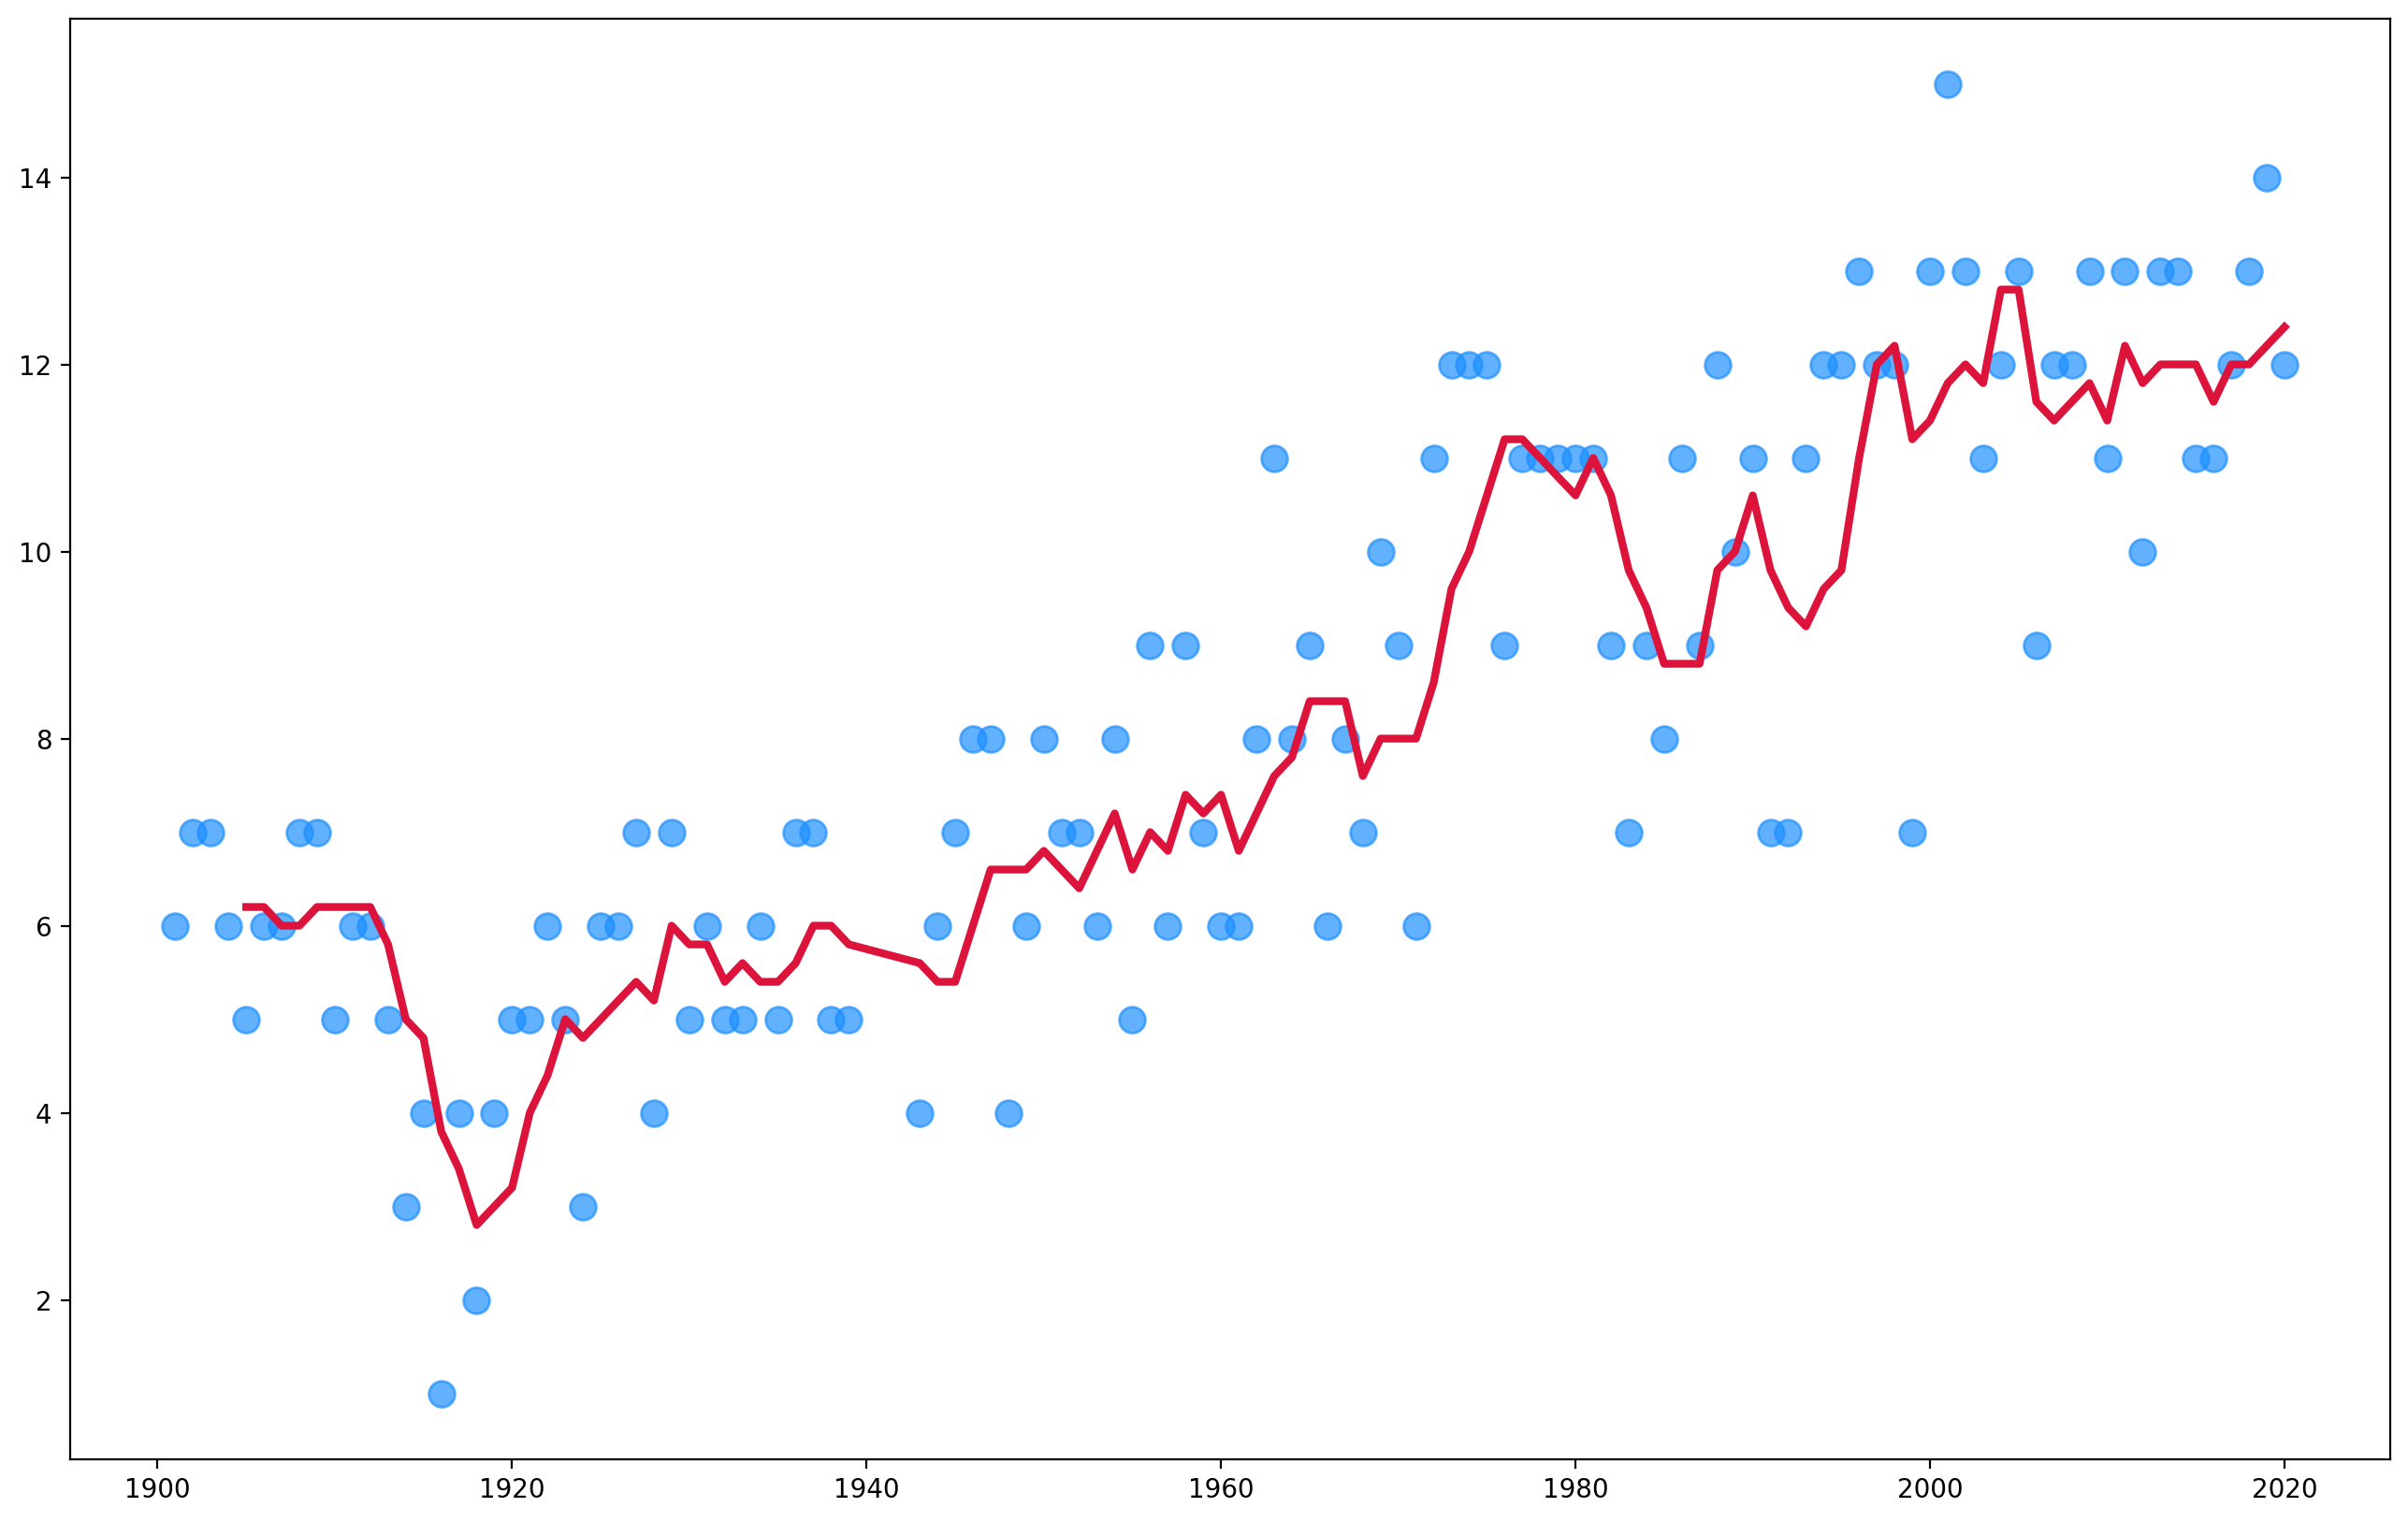

In [31]:
yearly_award_count = df_data.value_counts('year').sort_index(ascending=True)

yearly_award_count

# getting the 5-month rolling average
yearly_rolling_average = yearly_award_count.rolling(window=5).mean()

plt.figure(figsize=(16, 10), dpi=200)

s = plt.scatter(x=yearly_award_count.index,
               y=yearly_award_count.values,
               c='dodgerblue',
               alpha=0.7,
               s=100)

r = plt.plot(yearly_rolling_average.index,
             yearly_rolling_average.values,
            c='crimson',
            linewidth=3)


plt.show()

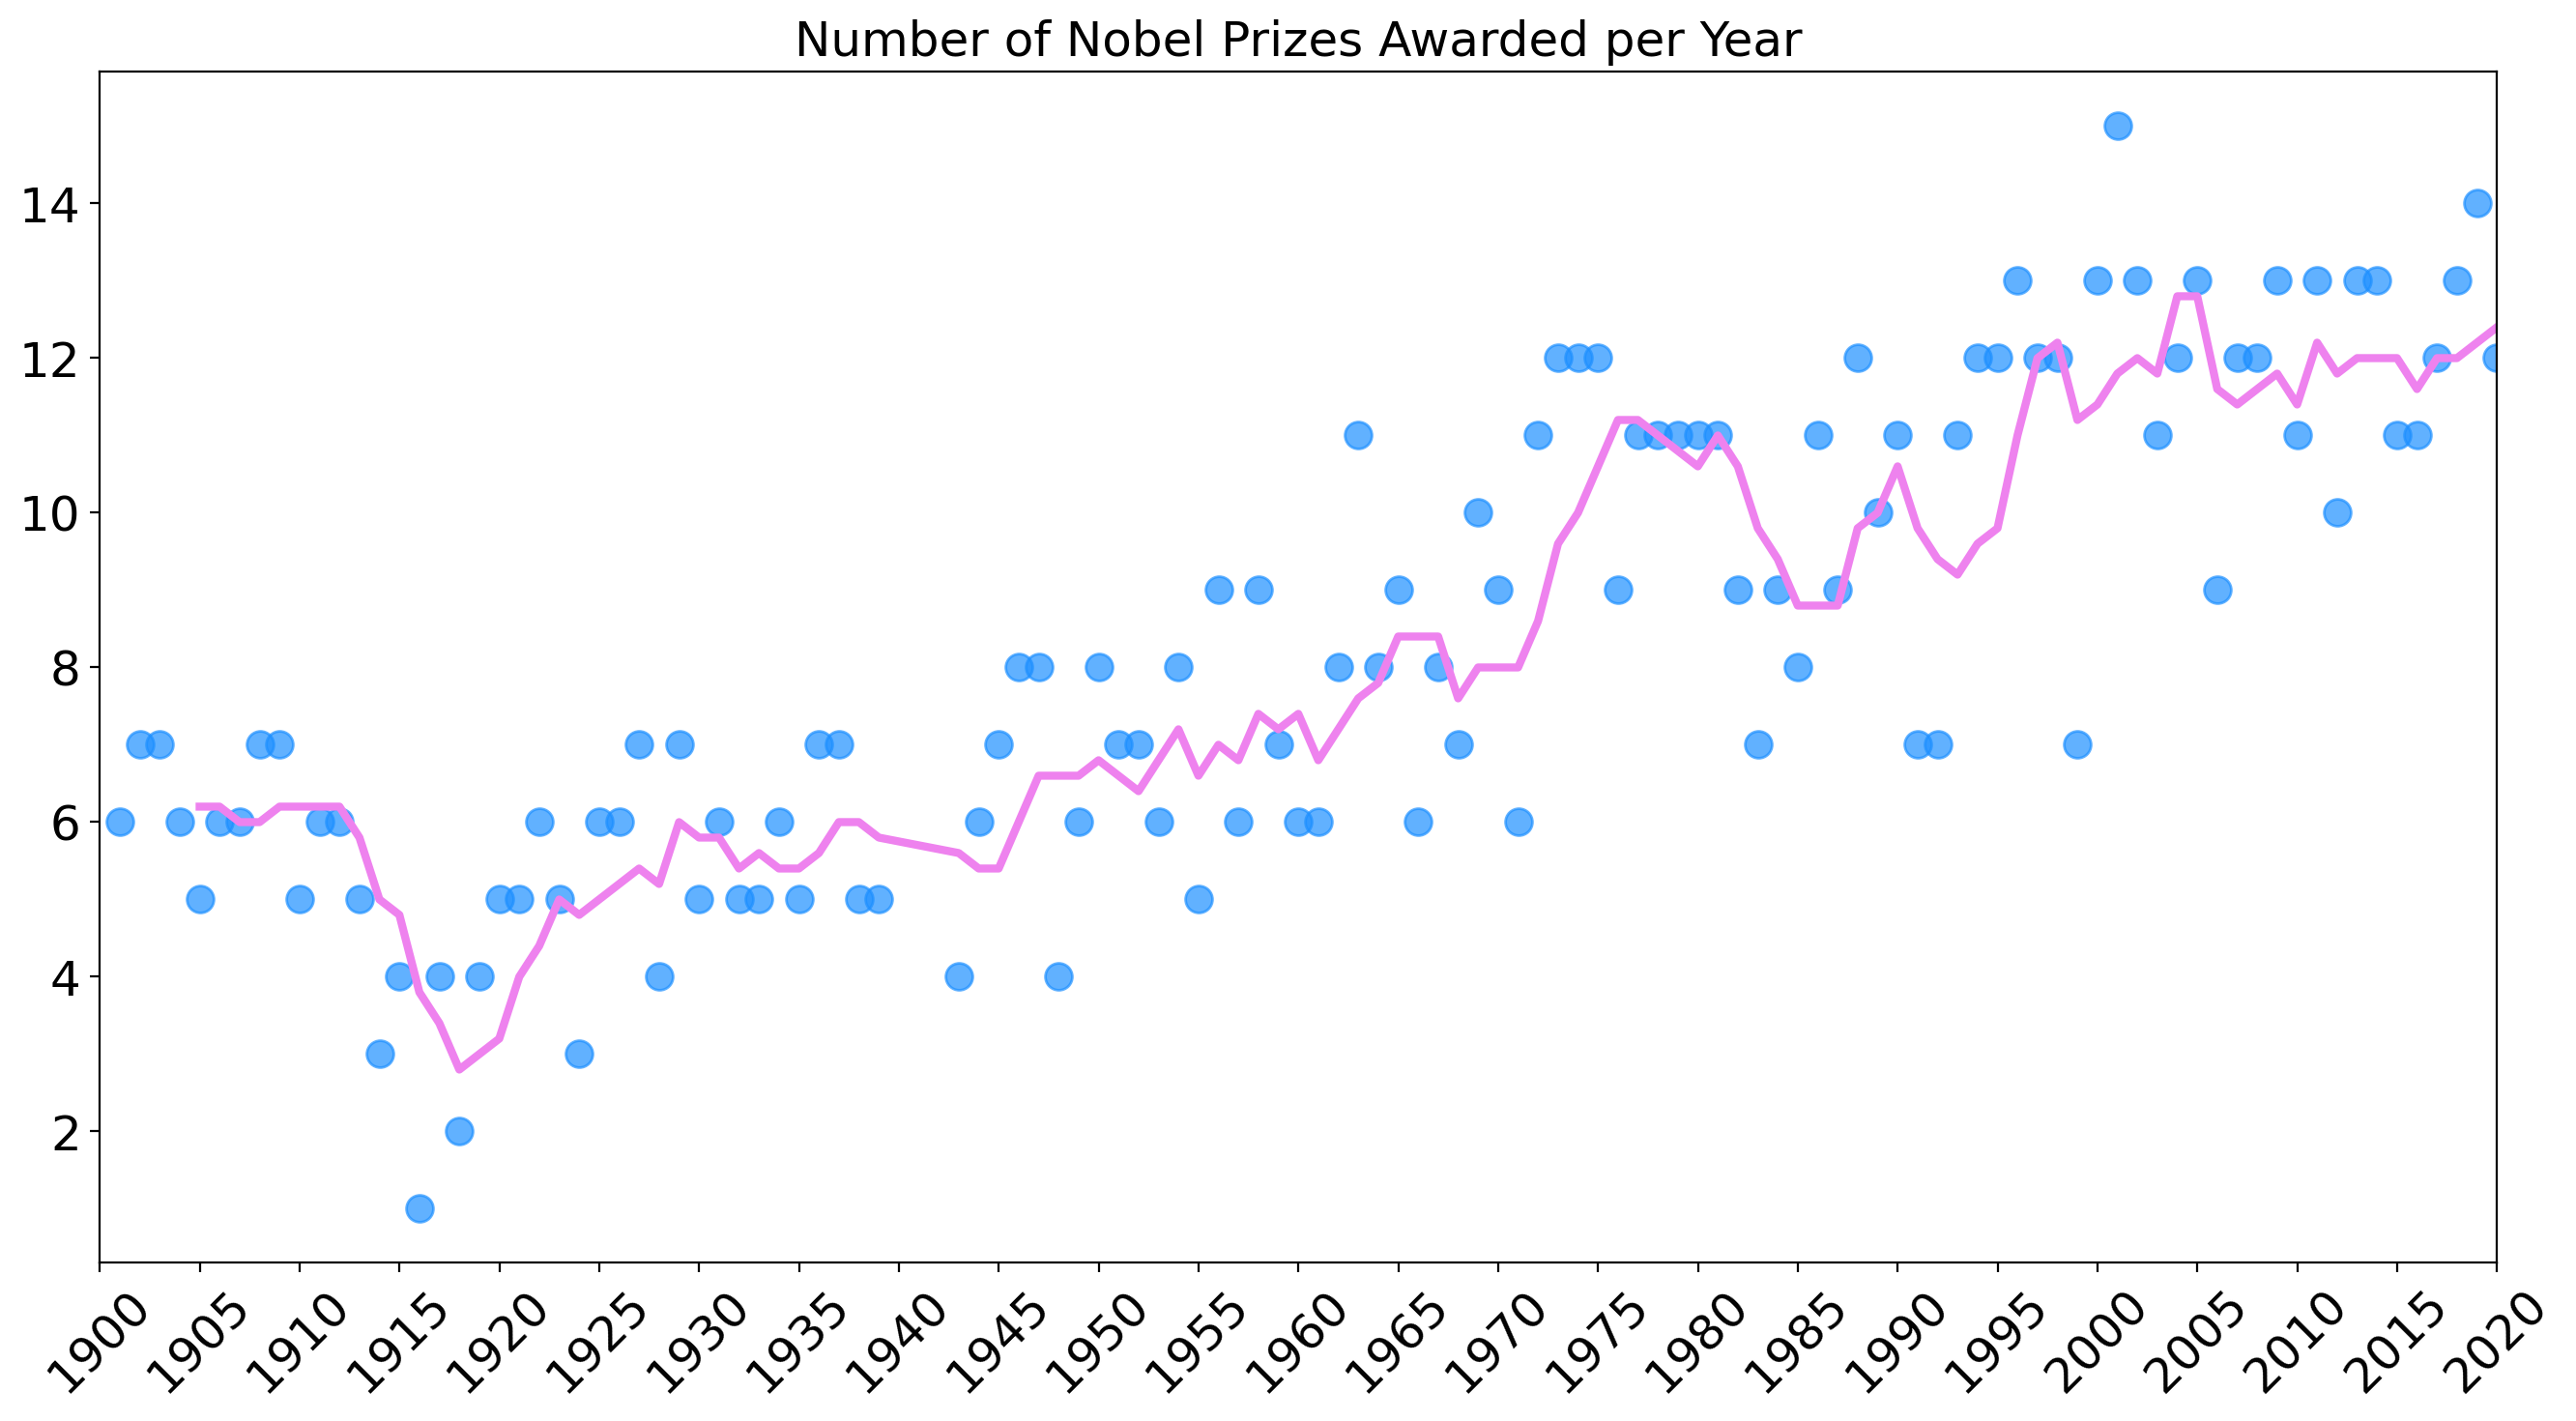

In [32]:
plt.figure(figsize=(16, 8), dpi=200)
plt.title("Number of Nobel Prizes Awarded per Year", fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(ticks=np.arange(1900, 2021, step=5),
          fontsize=18,
          rotation=45)

ax0 = plt.gca()  # get current axis

ax0.set_xlim(1900, 2020)

ax0 = plt.scatter(x=yearly_award_count.index,
                   y=yearly_award_count.values,
                   c='dodgerblue',
                   alpha=0.7,
                   s=100)

ax0 = plt.plot(yearly_rolling_average.index,
                 yearly_rolling_average.values,
                c='violet',
                linewidth=3)

plt.show()

# Are More Prizes Shared Than Before?

**Challenge**: Investigate if more prizes are shared than before. 

* Calculate the average prize share of the winners on a year by year basis.
* Calculate the 5 year rolling average of the percentage share.
* Copy-paste the cell from the chart you created above.
* Modify the code to add a secondary axis to your Matplotlib chart.
* Plot the rolling average of the prize share on this chart. 
* See if you can invert the secondary y-axis to make the relationship even more clear. 

In [33]:
share_pct = df_data.groupby(by='year').agg({'share_pct': pd.Series.mean})

sharing_rolling_average = share_pct.rolling(window=5).mean()

sharing_rolling_average

share_pct
year           
1901        NaN
1902        NaN
1903        NaN
1904        NaN
1905       0.82
...         ...
2016       0.52
2017       0.50
2018       0.50
2019       0.50
2020       0.49

[117 rows x 1 columns]

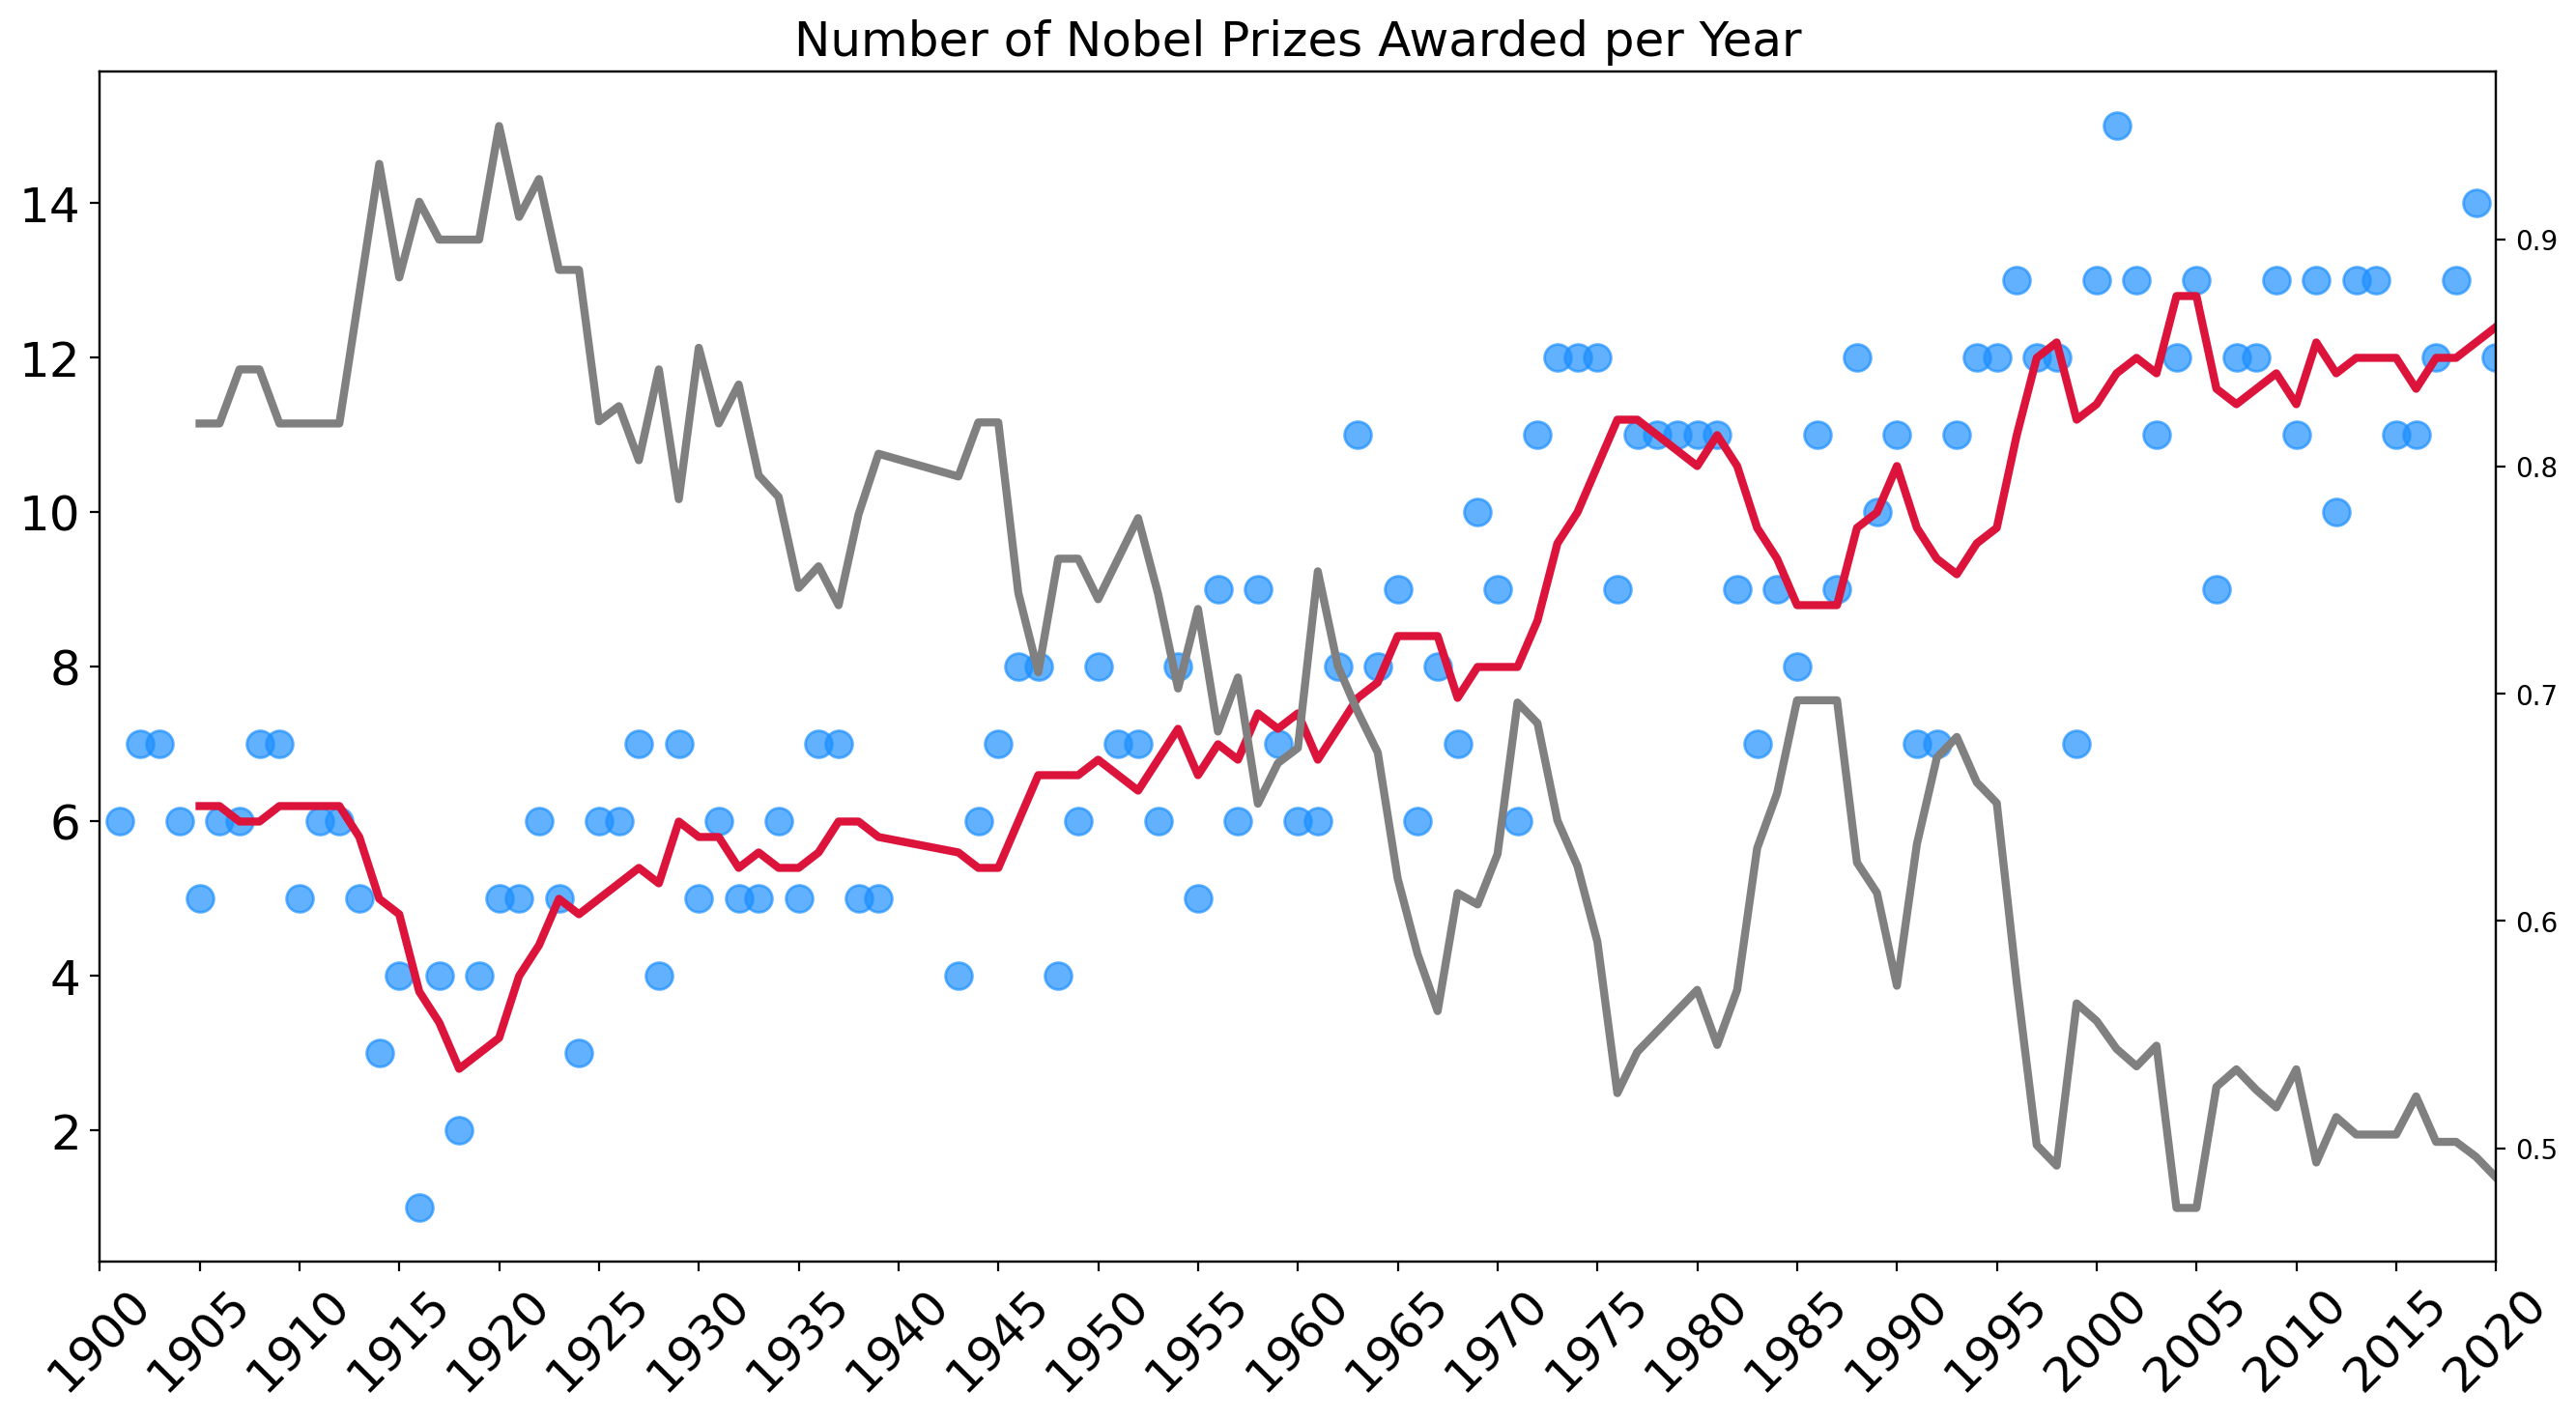

In [34]:
plt.figure(figsize=(16, 8), dpi=200)
plt.title("Number of Nobel Prizes Awarded per Year", fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(ticks=np.arange(1900, 2021, step=5),
          fontsize=18,
          rotation=45)

ax0 = plt.gca()  # get current axis
ax00 = ax0.twinx()  # a secondary axis

ax0.set_xlim(1900, 2020)

ax0.scatter(x=yearly_award_count.index,
                   y=yearly_award_count.values,
                   c='dodgerblue',
                   alpha=0.7,
                   s=100)

ax0.plot(yearly_rolling_average.index,
                 yearly_rolling_average.values,
                c='crimson',
                linewidth=3)

ax00.plot(sharing_rolling_average.index,
         sharing_rolling_average.share_pct,
         c='grey',
         linewidth=3,)

plt.show()

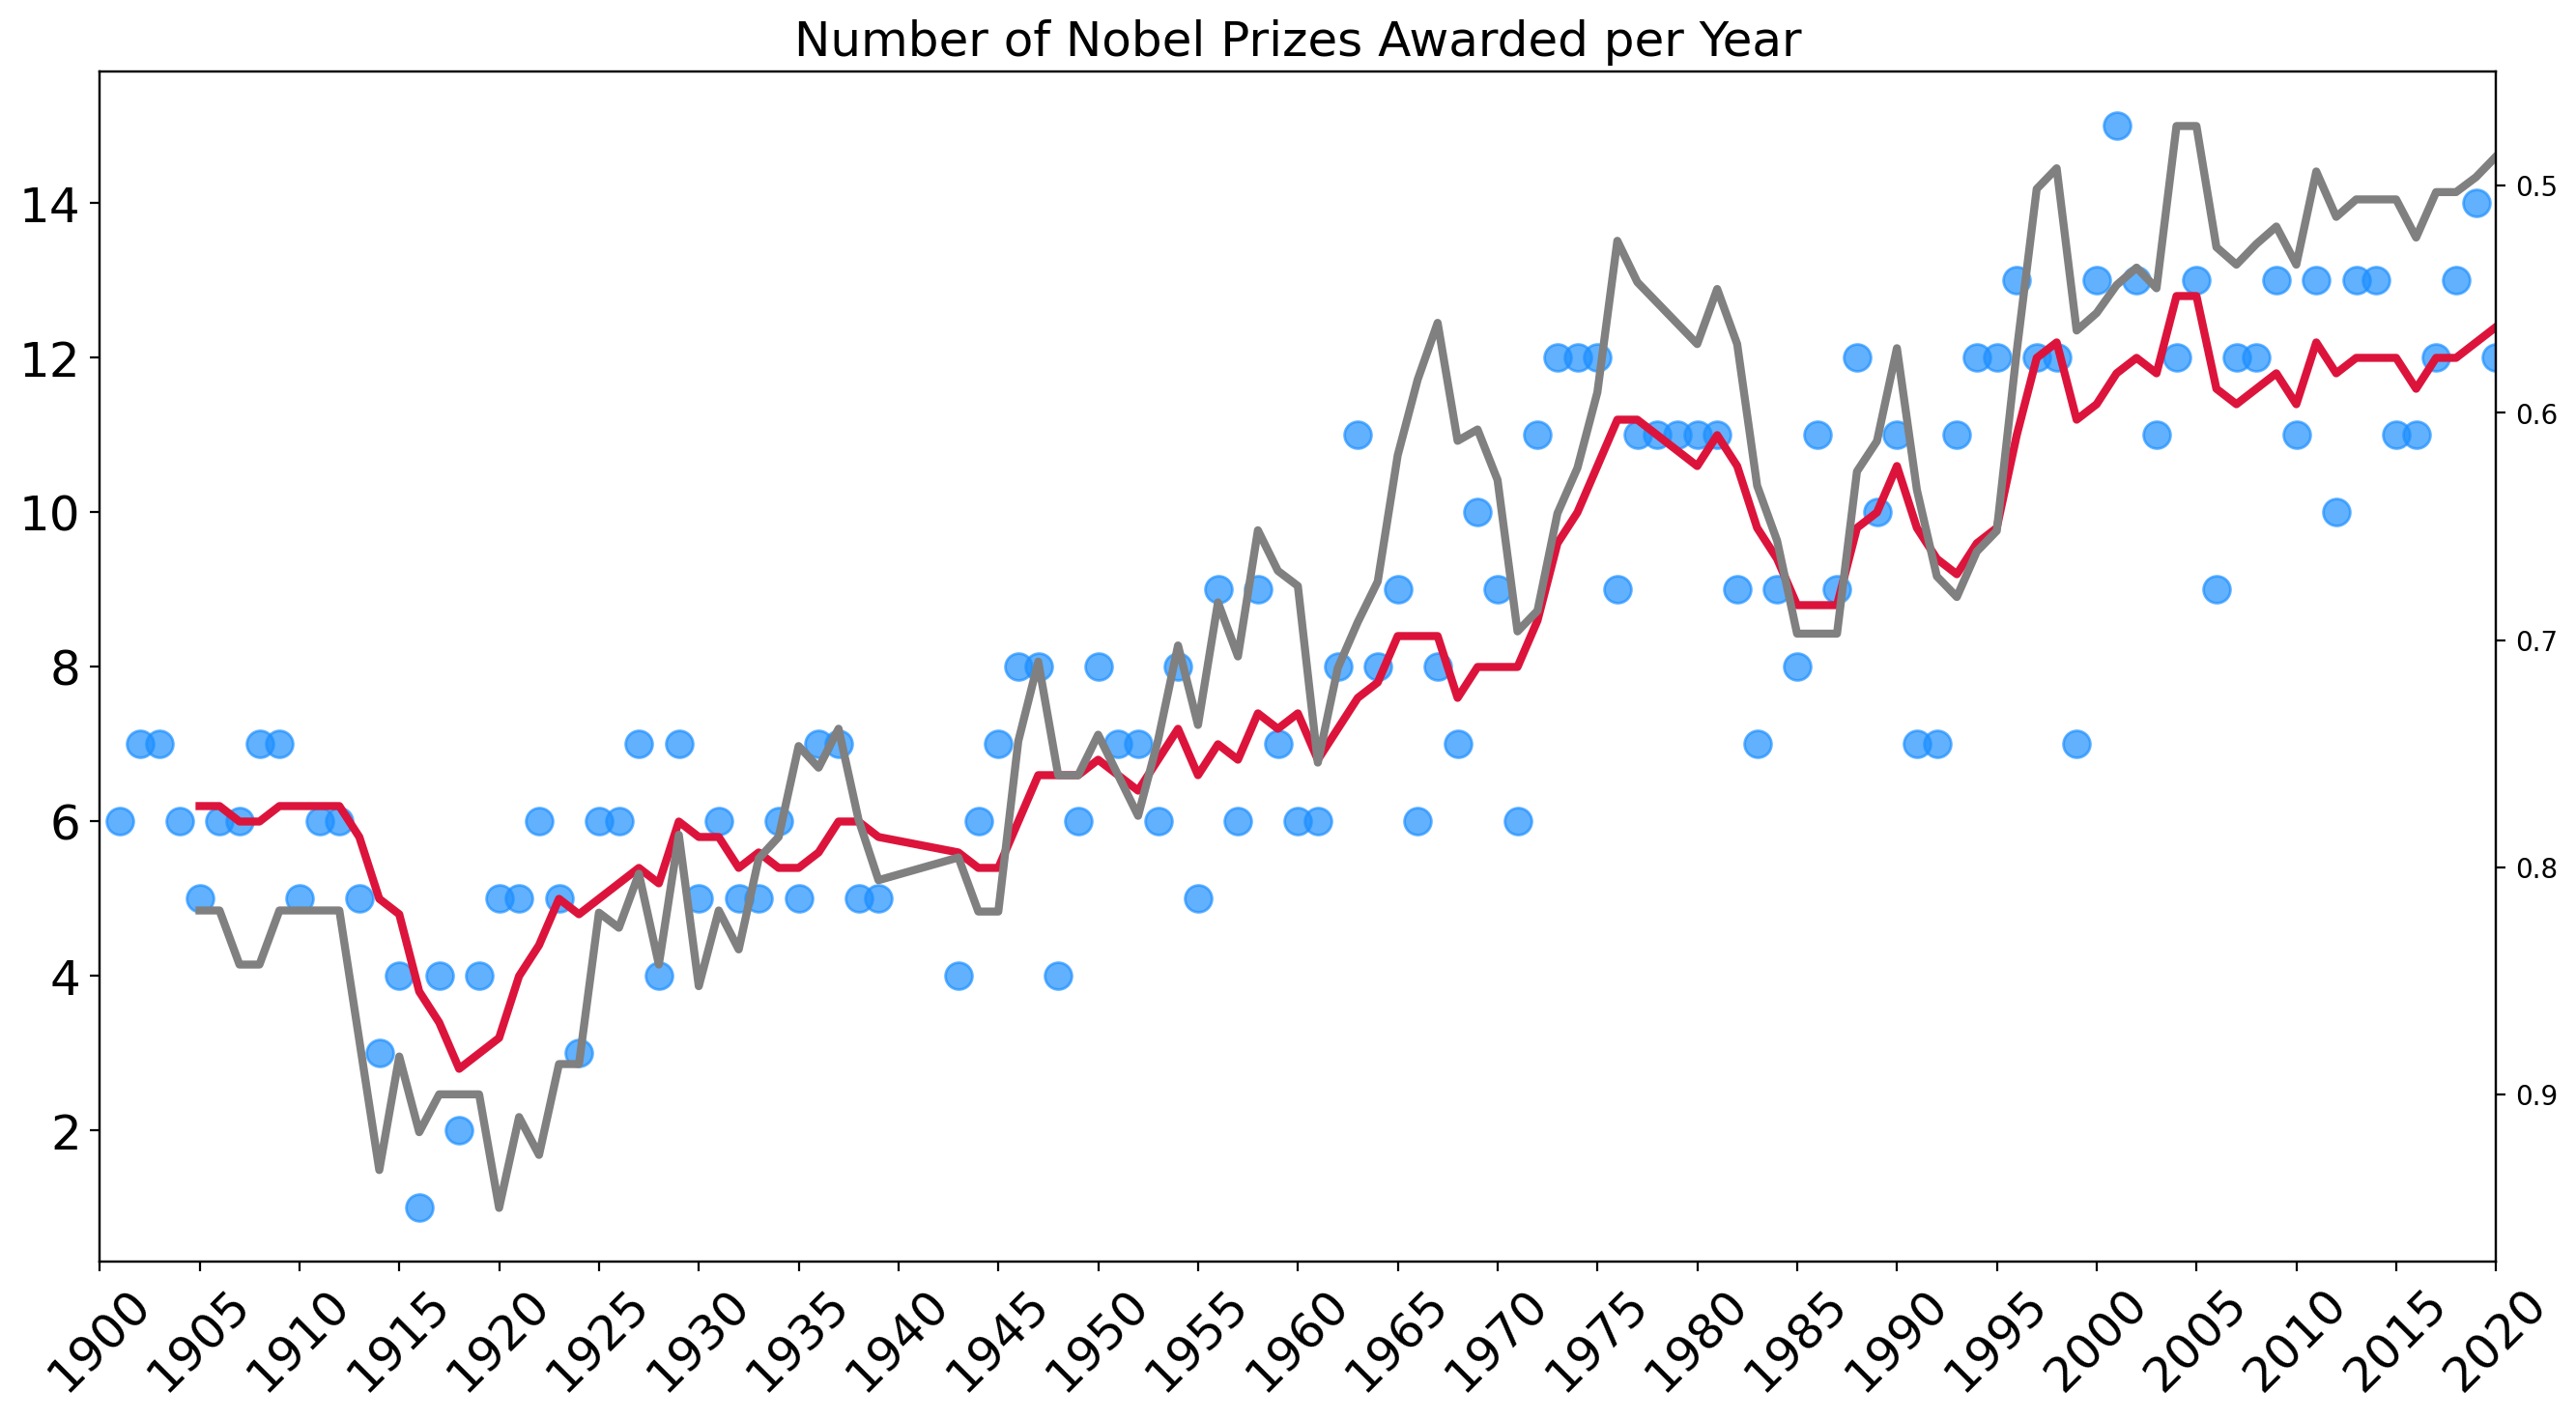

In [35]:
plt.figure(figsize=(16, 8), dpi=200)
plt.title("Number of Nobel Prizes Awarded per Year", fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(ticks=np.arange(1900, 2021, step=5),
          fontsize=18,
          rotation=45)

ax0 = plt.gca()  # get current axis
ax00 = ax0.twinx()  # a secondary axis

ax0.set_xlim(1900, 2020)

# Can invert axis
ax00.invert_yaxis()

ax0.scatter(x=yearly_award_count.index,
                   y=yearly_award_count.values,
                   c='dodgerblue',
                   alpha=0.7,
                   s=100)

ax0.plot(yearly_rolling_average.index,
                 yearly_rolling_average.values,
                c='crimson',
                linewidth=3)

ax00.plot(sharing_rolling_average.index,
         sharing_rolling_average.share_pct,
         c='grey',
         linewidth=3,)

plt.show()

# The Countries with the Most Nobel Prizes

**Challenge**: 
* Create a Pandas DataFrame called `top20_countries` that has the two columns. The `prize` column should contain the total number of prizes won. 

<img src=https://i.imgur.com/6HM8rfB.png width=350>

* Is it best to use `birth_country`, `birth_country_current` or `organization_country`? 
* What are some potential problems when using `birth_country` or any of the others? Which column is the least problematic? 
* Then use plotly to create a horizontal bar chart showing the number of prizes won by each country. Here's what you're after:

<img src=https://i.imgur.com/agcJdRS.png width=750>

* What is the ranking for the top 20 countries in terms of the number of prizes?

In [36]:
df_data.head(3)

year    category                                           prize  \
0  1901   Chemistry               The Nobel Prize in Chemistry 1901   
1  1901  Literature              The Nobel Prize in Literature 1901   
2  1901    Medicine  The Nobel Prize in Physiology or Medicine 1901   

                                          motivation prize_share  \
0  "in recognition of the extraordinary services ...         1/1   
1  "in special recognition of his poetic composit...         1/1   
2  "for his work on serum therapy, especially its...         1/1   

  laureate_type                     full_name birth_date         birth_city  \
0    Individual  Jacobus Henricus van 't Hoff 1852-08-30          Rotterdam   
1    Individual               Sully Prudhomme 1839-03-16              Paris   
2    Individual        Emil Adolf von Behring 1854-03-15  Hansdorf (Lawice)   

      birth_country birth_country_current   sex   organization_name  \
0       Netherlands           Netherlands  Male   Berlin University   
1            France                France  Male                 NaN   
2  Prussia (Poland)                Poland  Male  Marburg University   

  organization_city organization_country  ISO  share_pct  
0            Berlin              Germany  NLD       1.00  
1               NaN                  NaN  FRA       1.00  
2           Marburg              Germany  POL       1.00

In [37]:
top20_countries = df_data.groupby(by='birth_country_current', as_index=False).agg({'prize': pd.Series.count})

top20_countries.sort_values('prize', ascending=False, inplace=True)

top20_countries = top20_countries.head(20)

top20_countries

birth_country_current  prize
74  United States of America    281
73            United Kingdom    105
26                   Germany     84
25                    France     57
67                    Sweden     29
40                     Japan     27
57                    Poland     27
61                    Russia     26
11                    Canada     20
68               Switzerland     19
39                     Italy     19
3                    Austria     18
51               Netherlands     18
20                   Denmark     12
13                     China     12
54                    Norway     12
2                  Australia     10
7                    Belgium      9
33                     India      9
65              South Africa      9

In [38]:
hor = px.bar(data_frame=top20_countries,
            x='prize',
            y='birth_country_current',
            title='Top 20 Countries by Number of Prizes',
            orientation='h',
            color_continuous_scale='Viridis',
            color='prize'
            )

hor.update_layout(xaxis_title='Number of Prizes', 
                    yaxis_title='Country',
                    coloraxis_showscale=False)

hor.show()

# Use a Choropleth Map to Show the Number of Prizes Won by Country

* Create this choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/):

<img src=https://i.imgur.com/s4lqYZH.png>

* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 

Hint: You'll need to use a 3 letter country code for each country. 


In [39]:
df_data.head(1)

year   category                              prize  \
0  1901  Chemistry  The Nobel Prize in Chemistry 1901   

                                          motivation prize_share  \
0  "in recognition of the extraordinary services ...         1/1   

  laureate_type                     full_name birth_date birth_city  \
0    Individual  Jacobus Henricus van 't Hoff 1852-08-30  Rotterdam   

  birth_country birth_country_current   sex  organization_name  \
0   Netherlands           Netherlands  Male  Berlin University   

  organization_city organization_country  ISO  share_pct  
0            Berlin              Germany  NLD       1.00

In [40]:
df_countries = df_data.groupby(['birth_country_current', 'ISO'], as_index=False).agg({'prize': pd.Series.count})

df_countries.sort_values('prize', ascending=False)

birth_country_current  ISO  prize
74  United States of America  USA    281
73            United Kingdom  GBR    105
26                   Germany  DEU     84
25                    France  FRA     57
67                    Sweden  SWE     29
..                       ...  ...    ...
32                   Iceland  ISL      1
47                Madagascar  MDG      1
34                 Indonesia  IDN      1
36                      Iraq  IRQ      1
78                  Zimbabwe  ZWE      1

[79 rows x 3 columns]

In [41]:
world_map = px.choropleth(data_frame=df_countries,
                         locations='ISO',
                         color='prize',
                         hover_name='birth_country_current',
                         color_continuous_scale=px.colors.sequential.matter)

world_map.show()

# In Which Categories are the Different Countries Winning Prizes? 

**Challenge**: See if you can divide up the plotly bar chart you created above to show the which categories made up the total number of prizes. Here's what you're aiming for:

<img src=https://i.imgur.com/iGaIKCL.png>

* In which category are Germany and Japan the weakest compared to the United States?
* In which category does Germany have more prizes than the UK?
* In which categories does France have more prizes than Germany?
* Which category makes up most of Australia's nobel prizes?
* Which category makes up half of the prizes in the Netherlands?
* Does the United States have more prizes in Economics than all of France? What about in Physics or Medicine?


The hard part is preparing the data for this chart! 


*Hint*: Take a two-step approach. The first step is grouping the data by country and category. Then you can create a DataFrame that looks something like this:

<img src=https://i.imgur.com/VKjzKa1.png width=450>


In [42]:
top20_countries

birth_country_current  prize
74  United States of America    281
73            United Kingdom    105
26                   Germany     84
25                    France     57
67                    Sweden     29
40                     Japan     27
57                    Poland     27
61                    Russia     26
11                    Canada     20
68               Switzerland     19
39                     Italy     19
3                    Austria     18
51               Netherlands     18
20                   Denmark     12
13                     China     12
54                    Norway     12
2                  Australia     10
7                    Belgium      9
33                     India      9
65              South Africa      9

In [43]:
# getting the dataframe for categories in each country and the prize count for each category

category_count_per_country_df = df_data.groupby(['birth_country_current', 'category'], as_index=False).agg({'prize': pd.Series.count})

category_count_per_country_df

birth_country_current    category  prize
0                     Algeria  Literature      1
1                     Algeria     Physics      1
2                   Argentina    Medicine      2
3                   Argentina       Peace      2
4                   Australia   Chemistry      1
..                        ...         ...    ...
206  United States of America     Physics     70
207                 Venezuela    Medicine      1
208                   Vietnam       Peace      1
209                     Yemen       Peace      1
210                  Zimbabwe       Peace      1

[211 rows x 3 columns]

In [44]:
new_df = pd.merge(left=category_count_per_country_df,
                 right=top20_countries,
                 on='birth_country_current',)

new_df.rename(columns={'prize_x': 'cat_prize', 'prize_y': 'total_prize'}, inplace=True)

new_df.sort_values('total_prize', ascending=False, inplace=True)

new_df

birth_country_current    category  cat_prize  total_prize
108  United States of America     Physics         70          281
107  United States of America       Peace         19          281
106  United States of America    Medicine         78          281
105  United States of America  Literature         10          281
104  United States of America   Economics         49          281
..                        ...         ...        ...          ...
45                      India    Medicine          2            9
44                      India  Literature          2            9
43                      India   Economics          2            9
82               South Africa   Chemistry          1            9
42                      India   Chemistry          1            9

[109 rows x 4 columns]

In [45]:
# just checking

new_df[new_df.birth_country_current == 'United States of America']

birth_country_current    category  cat_prize  total_prize
108  United States of America     Physics         70          281
107  United States of America       Peace         19          281
106  United States of America    Medicine         78          281
105  United States of America  Literature         10          281
104  United States of America   Economics         49          281
103  United States of America   Chemistry         55          281

In [46]:
hor = px.bar(data_frame=new_df,
            x='total_prize',
            y='birth_country_current',
            title='Top 20 Countries by Number of Prizes and Category',
            orientation='h',
            color_continuous_scale='Viridis',
            color='category',)

hor.update_layout(xaxis_title='Number of Prizes', 
                    yaxis_title='Country',
                    coloraxis_showscale=False)

hor.show()

### Number of Prizes Won by Each Country Over Time

* When did the United States eclipse every other country in terms of the number of prizes won? 
* Which country or countries were leading previously?
* Calculate the cumulative number of prizes won by each country in every year. Again, use the `birth_country_current` of the winner to calculate this. 
* Create a [plotly line chart](https://plotly.com/python/line-charts/) where each country is a coloured line. 

In [47]:
prize_by_year = df_data.groupby(['birth_country_current', 'year'], as_index=False).count()

prize_by_year = prize_by_year.sort_values('year')[['year', 'birth_country_current', 'prize']]

prize_by_year

year     birth_country_current  prize
118  1901                    France      2
346  1901                    Poland      1
159  1901                   Germany      1
312  1901               Netherlands      1
440  1901               Switzerland      1
..    ...                       ...    ...
31   2019                   Austria      1
221  2020                   Germany      1
622  2020  United States of America      7
533  2020            United Kingdom      2
158  2020                    France      1

[627 rows x 3 columns]

In [48]:
cumulative_prizes = prize_by_year.groupby(['birth_country_current', 'year']).sum().groupby(level=[0]).cumsum()
cumulative_prizes

prize
birth_country_current    year       
Algeria                  1957      1
                         1997      2
Argentina                1936      1
                         1947      2
                         1980      3
...                              ...
United States of America 2020    281
Venezuela                1980      1
Vietnam                  1973      1
Yemen                    2011      1
Zimbabwe                 1960      1

[627 rows x 1 columns]

In [49]:
cumulative_prizes.reset_index(inplace=True)

cumulative_prizes

birth_country_current  year  prize
0                     Algeria  1957      1
1                     Algeria  1997      2
2                   Argentina  1936      1
3                   Argentina  1947      2
4                   Argentina  1980      3
..                        ...   ...    ...
622  United States of America  2020    281
623                 Venezuela  1980      1
624                   Vietnam  1973      1
625                     Yemen  2011      1
626                  Zimbabwe  1960      1

[627 rows x 3 columns]

In [50]:
l_chart = px.line(data_frame=cumulative_prizes,
                 x='year',
                 y='prize',
                 color='birth_country_current',
                 hover_name='birth_country_current')

l_chart.update_layout(xaxis_title='Year',
                     yaxis_title='Number of Prizes')


l_chart.show()

# What are the Top Research Organisations?

**Challenge**: Create a bar chart showing the organisations affiliated with the Nobel laureates. It should looks something like this:

<img src=https://i.imgur.com/zZihj2p.png width=600>

* Which organisations make up the top 20?
* How many Nobel prize winners are affiliated with the University of Chicago and Harvard University?

In [51]:
df_data.head(1)

year   category                              prize  \
0  1901  Chemistry  The Nobel Prize in Chemistry 1901   

                                          motivation prize_share  \
0  "in recognition of the extraordinary services ...         1/1   

  laureate_type                     full_name birth_date birth_city  \
0    Individual  Jacobus Henricus van 't Hoff 1852-08-30  Rotterdam   

  birth_country birth_country_current   sex  organization_name  \
0   Netherlands           Netherlands  Male  Berlin University   

  organization_city organization_country  ISO  share_pct  
0            Berlin              Germany  NLD       1.00

In [52]:
top20_organization = df_data.groupby('organization_name', as_index=False).agg({'prize': pd.Series.count})

top20_organization.sort_values(by='prize', ascending=False, inplace=True)

top20_organization = top20_organization[:21]

top20_organization

organization_name  prize
196                      University of California     40
68                             Harvard University     29
167                           Stanford University     23
117   Massachusetts Institute of Technology (MIT)     21
198                         University of Chicago     20
197                       University of Cambridge     18
26   California Institute of Technology (Caltech)     17
38                            Columbia University     17
146                          Princeton University     15
152                        Rockefeller University     13
119                           Max-Planck-Institut     13
222                          University of Oxford     12
111           MRC Laboratory of Molecular Biology     10
258                               Yale University      9
40                             Cornell University      8
12                              Bell Laboratories      8
109                             London University      7
163                           Sorbonne University      7
67                         Harvard Medical School      7
192                     University College London      7
79                               Institut Pasteur      7

In [53]:
hor = px.bar(data_frame=top20_organization,
            x='prize',
            y='organization_name',
            title='Top 20 Research Institution by Number of Prizes',
            orientation='h',
            color_continuous_scale=px.colors.sequential.haline,
            color='prize'
            )

hor.update_layout(xaxis_title='Number of Prizes', 
                    yaxis_title='Institution',
                    coloraxis_showscale=False,
                    paper_bgcolor='black',
                    plot_bgcolor='grey')

hor.show()

# Which Cities Make the Most Discoveries? 

Where do major discoveries take place?  

**Challenge**: 
* Create another plotly bar chart graphing the top 20 organisation cities of the research institutions associated with a Nobel laureate. 
* Where is the number one hotspot for discoveries in the world?
* Which city in Europe has had the most discoveries?

In [54]:
top20_organization_city = df_data.groupby('organization_city', as_index=False).agg({'prize': pd.Series.count})

top20_organization_city.sort_values('prize', ascending=False, inplace=True)

top20_organization_city = top20_organization_city[:21]

top20_organization_city

organization_city  prize
34      Cambridge, MA     50
121      New York, NY     45
33          Cambridge     31
92             London     27
128             Paris     25
156      Stanford, CA     24
12       Berkeley, CA     21
39        Chicago, IL     20
135     Princeton, NJ     19
129      Pasadena, CA     17
126            Oxford     12
13             Berlin     12
157         Stockholm     10
108            Moscow     10
71         Heidelberg      9
110            Munich      9
23         Boston, MA      9
119     New Haven, CT      9
78         Ithaca, NY      8
65          Göttingen      8
93    Los Angeles, CA      8

In [55]:
hor = px.bar(data_frame=top20_organization_city,
            x='prize',
            y='organization_city',
            title='Which Cities Do The Most Research?',
            orientation='h',
            color_continuous_scale=px.colors.sequential.Plasma,
            color='prize'
            )

hor.update_layout(xaxis_title='Number of Prizes', 
                    yaxis_title='Research Cities',
                    coloraxis_showscale=False,
                    paper_bgcolor='black',
                    plot_bgcolor='grey')

hor.show()

# Where are Nobel Laureates Born? Chart the Laureate Birth Cities 

**Challenge**: 
* Create a plotly bar chart graphing the top 20 birth cities of Nobel laureates. 
* Use a named colour scale called `Plasma` for the chart.
* What percentage of the United States prizes came from Nobel laureates born in New York? 
* How many Nobel laureates were born in London, Paris and Vienna? 
* Out of the top 5 cities, how many are in the United States?


In [56]:
top20_birth_cities = df_data.birth_city.value_counts()[:21]

top20_birth_cities.sort_values(ascending=True, inplace=True)

top20_birth_cities

birth_city
Kyoto                     3
Ann Arbor, MI             3
Pittsburgh, PA            4
Montreal                  4
Cairo                     4
Prague                    5
Frankfurt-on-the-Main     5
Hamburg                   6
Stockholm                 6
Moscow                    7
Munich                    7
Boston, MA                8
Brooklyn, NY              8
Washington, DC            8
Budapest                  8
Berlin                   11
Chicago, IL              12
Vienna                   14
London                   19
Paris                    26
New York, NY             53
Name: count, dtype: int64

In [57]:
ho = px.bar(x=top20_birth_cities.values,
            y=top20_birth_cities.index,
            title='Where were the Nobel Laureates Born?',
            orientation='h',
            color_continuous_scale=px.colors.sequential.Plasma,
            color=top20_birth_cities.values
            )

ho.update_layout(xaxis_title='Number of Prizes', 
                    yaxis_title='Birth City',
                    coloraxis_showscale=False,
                    paper_bgcolor='black',
                    plot_bgcolor='grey')

ho.show()

# Plotly Sunburst Chart: Combine Country, City, and Organisation

**Challenge**: 

* Create a DataFrame that groups the number of prizes by organisation. 
* Then use the [plotly documentation to create a sunburst chart](https://plotly.com/python/sunburst-charts/)
* Click around in your chart, what do you notice about Germany and France? 


Here's what you're aiming for:

<img src=https://i.imgur.com/cemX4m5.png width=300>



In [58]:
df_data.head(1)

year   category                              prize  \
0  1901  Chemistry  The Nobel Prize in Chemistry 1901   

                                          motivation prize_share  \
0  "in recognition of the extraordinary services ...         1/1   

  laureate_type                     full_name birth_date birth_city  \
0    Individual  Jacobus Henricus van 't Hoff 1852-08-30  Rotterdam   

  birth_country birth_country_current   sex  organization_name  \
0   Netherlands           Netherlands  Male  Berlin University   

  organization_city organization_country  ISO  share_pct  
0            Berlin              Germany  NLD       1.00

In [59]:
country_city_org = df_data.groupby(['organization_country', 'organization_city', 'organization_name'],
               as_index=False).agg({'prize': pd.Series.count})

country_city_org.sort_values('prize', ascending=False, inplace=True)

country_city_org

organization_country     organization_city  \
205  United States of America         Cambridge, MA   
280  United States of America          Stanford, CA   
206  United States of America         Cambridge, MA   
209  United States of America           Chicago, IL   
195  United States of America          Berkeley, CA   
..                        ...                   ...   
110                     Japan               Sapporo   
111                     Japan                 Tokyo   
112                     Japan                 Tokyo   
113                     Japan                 Tokyo   
290  United States of America  Yorktown Heights, NY   

                               organization_name  prize  
205                           Harvard University     29  
280                          Stanford University     23  
206  Massachusetts Institute of Technology (MIT)     21  
209                        University of Chicago     20  
195                     University of California     19  
..                                           ...    ...  
110                          Hokkaido University      1  
111                      Asahi Kasei Corporation      1  
112                          Kitasato University      1  
113                Tokyo Institute of Technology      1  
290         IBM Thomas J. Watson Research Center      1  

[291 rows x 4 columns]

In [60]:
burst = px.sunburst(data_frame=country_city_org,
                   path=['organization_country', 'organization_city', 'organization_name'],
                   values='prize',
                   title='Where do Discoveries Take Place?',
                   )

burst.update_layout(xaxis_title='Number of Prizes', 
                    yaxis_title='City',
                    coloraxis_showscale=False)
 
burst.show()

# Patterns in the Laureate Age at the Time of the Award

How Old Are the Laureates When the Win the Prize?

**Challenge**: Calculate the age of the laureate in the year of the ceremony and add this as a column called `winning_age` to the `df_data` DataFrame. Hint: you can use [this](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.html) to help you. 



In [61]:
df_data.shape

(962, 17)

In [62]:
# We can see that the laureate type "Individual" is the one with only birth date
# extracting this from df_data

individual_laureate = df_data.query('laureate_type == "Individual"')

# calculating the winning age for each individual laureate
winning_age = individual_laureate.year - individual_laureate.birth_date.dt.year

# insering the winning age into the new individual_laureate dataframe
individual_laureate.insert(loc=len(individual_laureate.columns),
                           column='winning_age',
                           value=winning_age)

individual_laureate.head(3)

year    category                                           prize  \
0  1901   Chemistry               The Nobel Prize in Chemistry 1901   
1  1901  Literature              The Nobel Prize in Literature 1901   
2  1901    Medicine  The Nobel Prize in Physiology or Medicine 1901   

                                          motivation prize_share  \
0  "in recognition of the extraordinary services ...         1/1   
1  "in special recognition of his poetic composit...         1/1   
2  "for his work on serum therapy, especially its...         1/1   

  laureate_type                     full_name birth_date         birth_city  \
0    Individual  Jacobus Henricus van 't Hoff 1852-08-30          Rotterdam   
1    Individual               Sully Prudhomme 1839-03-16              Paris   
2    Individual        Emil Adolf von Behring 1854-03-15  Hansdorf (Lawice)   

      birth_country birth_country_current   sex   organization_name  \
0       Netherlands           Netherlands  Male   Berlin University   
1            France                France  Male                 NaN   
2  Prussia (Poland)                Poland  Male  Marburg University   

  organization_city organization_country  ISO  share_pct  winning_age  
0            Berlin              Germany  NLD       1.00           49  
1               NaN                  NaN  FRA       1.00           62  
2           Marburg              Germany  POL       1.00           47

In [63]:
# extracting part of the data frame to be merge with df_data
to_merge = individual_laureate[['birth_date', 'winning_age']]

# the merge
df_data = df_data.merge(right=to_merge,
                 how='left',
                 on='birth_date')

df_data.head(2)

year    category                               prize  \
0  1901   Chemistry   The Nobel Prize in Chemistry 1901   
1  1901  Literature  The Nobel Prize in Literature 1901   

                                          motivation prize_share  \
0  "in recognition of the extraordinary services ...         1/1   
1  "in special recognition of his poetic composit...         1/1   

  laureate_type                     full_name birth_date birth_city  \
0    Individual  Jacobus Henricus van 't Hoff 1852-08-30  Rotterdam   
1    Individual               Sully Prudhomme 1839-03-16      Paris   

  birth_country birth_country_current   sex  organization_name  \
0   Netherlands           Netherlands  Male  Berlin University   
1        France                France  Male                NaN   

  organization_city organization_country  ISO  share_pct  winning_age  
0            Berlin              Germany  NLD       1.00        49.00  
1               NaN                  NaN  FRA       1.00        62.00

In [64]:
df_data

year    category                                           prize  \
0    1901   Chemistry               The Nobel Prize in Chemistry 1901   
1    1901  Literature              The Nobel Prize in Literature 1901   
2    1901    Medicine  The Nobel Prize in Physiology or Medicine 1901   
3    1901       Peace                      The Nobel Peace Prize 1901   
4    1901       Peace                      The Nobel Peace Prize 1901   
..    ...         ...                                             ...   
991  2020    Medicine  The Nobel Prize in Physiology or Medicine 2020   
992  2020       Peace                      The Nobel Peace Prize 2020   
993  2020     Physics                 The Nobel Prize in Physics 2020   
994  2020     Physics                 The Nobel Prize in Physics 2020   
995  2020     Physics                 The Nobel Prize in Physics 2020   

                                            motivation prize_share  \
0    "in recognition of the extraordinary services ...         1/1   
1    "in special recognition of his poetic composit...         1/1   
2    "for his work on serum therapy, especially its...         1/1   
3                                                  NaN         1/2   
4                                                  NaN         1/2   
..                                                 ...         ...   
991           “for the discovery of Hepatitis C virus”         1/3   
992  “for its efforts to combat hunger, for its con...         1/1   
993  “for the discovery of a supermassive compact o...         1/4   
994  “for the discovery of a supermassive compact o...         1/4   
995  “for the discovery that black hole formation i...         1/2   

    laureate_type                     full_name birth_date  \
0      Individual  Jacobus Henricus van 't Hoff 1852-08-30   
1      Individual               Sully Prudhomme 1839-03-16   
2      Individual        Emil Adolf von Behring 1854-03-15   
3      Individual                Frédéric Passy 1822-05-20   
4      Individual             Jean Henry Dunant 1828-05-08   
..            ...                           ...        ...   
991    Individual              Michael Houghton 1949-07-02   
992  Organization    World Food Programme (WFP)        NaT   
993    Individual                   Andrea Ghez 1965-06-16   
994    Individual               Reinhard Genzel 1952-03-24   
995    Individual                 Roger Penrose 1931-08-08   

                   birth_city             birth_country  \
0                   Rotterdam               Netherlands   
1                       Paris                    France   
2           Hansdorf (Lawice)          Prussia (Poland)   
3                       Paris                    France   
4                      Geneva               Switzerland   
..                        ...                       ...   
991                       NaN            United Kingdom   
992                       NaN                       NaN   
993              New York, NY  United States of America   
994  Bad Homburg vor der Höhe                   Germany   
995                Colchester            United Kingdom   

        birth_country_current     sex         organization_name  \
0                 Netherlands    Male         Berlin University   
1                      France    Male                       NaN   
2                      Poland    Male        Marburg University   
3                      France    Male                       NaN   
4                 Switzerland    Male                       NaN   
..                        ...     ...                       ...   
991            United Kingdom    Male     University of Alberta   
992                       NaN     NaN                       NaN   
993  United States of America  Female  University of California   
994                   Germany    Male  University of California   
995            United Kingdom    Male      University of Oxford   

    organization_city      o

In [65]:
# You can now see that for the Organization which has no birth_date, there is no winning age

df_data.query('laureate_type == "Organization"')

year category                       prize  \
27   1904    Peace  The Nobel Peace Prize 1904   
64   1910    Peace  The Nobel Peace Prize 1910   
94   1917    Peace  The Nobel Peace Prize 1917   
206  1938    Peace  The Nobel Peace Prize 1938   
222  1944    Peace  The Nobel Peace Prize 1944   
245  1947    Peace  The Nobel Peace Prize 1947   
246  1947    Peace  The Nobel Peace Prize 1947   
293  1954    Peace  The Nobel Peace Prize 1954   
362  1963    Peace  The Nobel Peace Prize 1963   
363  1963    Peace  The Nobel Peace Prize 1963   
380  1965    Peace  The Nobel Peace Prize 1965   
413  1969    Peace  The Nobel Peace Prize 1969   
450  1973    Peace  The Nobel Peace Prize 1973   
497  1977    Peace  The Nobel Peace Prize 1977   
519  1979    Peace  The Nobel Peace Prize 1979   
542  1981    Peace  The Nobel Peace Prize 1981   
579  1985    Peace  The Nobel Peace Prize 1985   
609  1988    Peace  The Nobel Peace Prize 1988   
619  1989    Peace  The Nobel Peace Prize 1989   
639  1991    Peace  The Nobel Peace Prize 1991   
682  1995    Peace  The Nobel Peace Prize 1995   
706  1997    Peace  The Nobel Peace Prize 1997   
729  1999    Peace  The Nobel Peace Prize 1999   
758  2001    Peace  The Nobel Peace Prize 2001   
808  2005    Peace  The Nobel Peace Prize 2005   
818  2006    Peace  The Nobel Peace Prize 2006   
831  2007    Peace  The Nobel Peace Prize 2007   
891  2012    Peace  The Nobel Peace Prize 2012   
905  2013    Peace  The Nobel Peace Prize 2013   
929  2015    Peace  The Nobel Peace Prize 2015   
951  2017    Peace  The Nobel Peace Prize 2017   
992  2020    Peace  The Nobel Peace Prize 2020   

                                            motivation prize_share  \
27                                                 NaN         1/1   
64                                                 NaN         1/1   
94                                                 NaN         1/1   
206                                                NaN         1/1   
222                                                NaN         1/1   
245                                                NaN         1/2   
246                                                NaN         1/2   
293                                                NaN         1/1   
362                                                NaN         1/2   
363                                                NaN         1/2   
380                                                NaN         1/1   
413                                                NaN         1/1   
450                                                NaN         1/2   
497                                                NaN         1/1   
519                                                NaN         1/1   
542                                                NaN         1/1   
579                                                NaN         1/1   
609                                                NaN         1/1   
619                                                NaN         1/1   
639  "for her non-violent struggle for democracy an...         1/1   
682  "for their efforts to diminish the part played...         1/2   
706  "for their work for the banning and clearing o...         1/2   
729  "in recognition of the organization's pioneeri...         1/1   
758  "for their work for a better organized and mor...         1/2   
808  "for their efforts to prevent nuclear energy f...         1/2   
818  "for their efforts to create economic and soci...         1/2   
831  "for their efforts to build up and disseminate...         1/2   
891  "for over six decades contributed to the advan...         1/1   
905  "for its extensive efforts to eliminate chemic...         1/1   
929  "for its decisive contribution to the building...         1/1   
951  “for its work to draw attention to the catastr...         1/1   
992  “for its efforts to combat hunger, for its con...         1/1   

    laureate_type                          

### Who were the oldest and youngest winners?

**Challenge**: 
* What are the names of the youngest and oldest Nobel laureate? 
* What did they win the prize for?
* What is the average age of a winner?
* 75% of laureates are younger than what age when they receive the prize?
* Use Seaborn to [create histogram](https://seaborn.pydata.org/generated/seaborn.histplot.html) to visualise the distribution of laureate age at the time of winning. Experiment with the number of `bins` to see how the visualisation changes.

In [66]:
df_data.describe()

year                     birth_date  share_pct  winning_age
count   996.00                            968     996.00       964.00
mean  1,971.75  1912-03-16 06:19:20.330578432       0.63        59.93
min   1,901.00            1817-11-30 00:00:00       0.25        17.00
25%   1,948.00            1892-04-24 00:00:00       0.33        51.00
50%   1,977.00            1918-01-06 12:00:00       0.50        60.00
75%   2,000.25            1937-03-13 06:00:00       1.00        69.00
max   2,020.00            1997-07-12 00:00:00       1.00        97.00
std      33.85                            NaN       0.29        12.68

In [67]:
# Question 1. What are the names of the youngest and oldest Nobel laureate?

oldest_laureate_winner = df_data.loc[df_data.winning_age.idxmax()]

oldest_laureate_winner.full_name

print(f'The oldest laureate winner is {oldest_laureate_winner.full_name}')

youngest_laureate_winner = df_data.loc[df_data.winning_age.idxmin()]

print(f'The youngest laureate winner is {youngest_laureate_winner.full_name}')

The oldest laureate winner is John Goodenough
The youngest laureate winner is Malala Yousafzai


In [68]:
# Question 2. What did they win the prize for?

print(f'The oldest winner, {oldest_laureate_winner.full_name} won the prize {oldest_laureate_winner.motivation}')

print(f'\nThe youngest winner, {youngest_laureate_winner.full_name} won the prize {youngest_laureate_winner.motivation}')

The oldest winner, John Goodenough won the prize “for the development of lithium-ion batteries”

The youngest winner, Malala Yousafzai won the prize "for their struggle against the suppression of children and young people and for the right of all children to education"


In [69]:
# Question 3. What is the average age of a winner?

print(f'The average of the oldest winner is {int(oldest_laureate_winner.winning_age)}')

print(f'\nThe average age of the youngest winner is {int(youngest_laureate_winner.winning_age)}')

The average of the oldest winner is 97

The average age of the youngest winner is 17


In [70]:
# Question 4. 75% of laureates are younger than what age when they receive the prize?

younger_than_75 =  df_data.winning_age.quantile(0.75)

print(f'75% of the laureates are younger than {int(younger_than_75)} years when they receive th prize')

75% of the laureates are younger than 69 years when they receive th prize


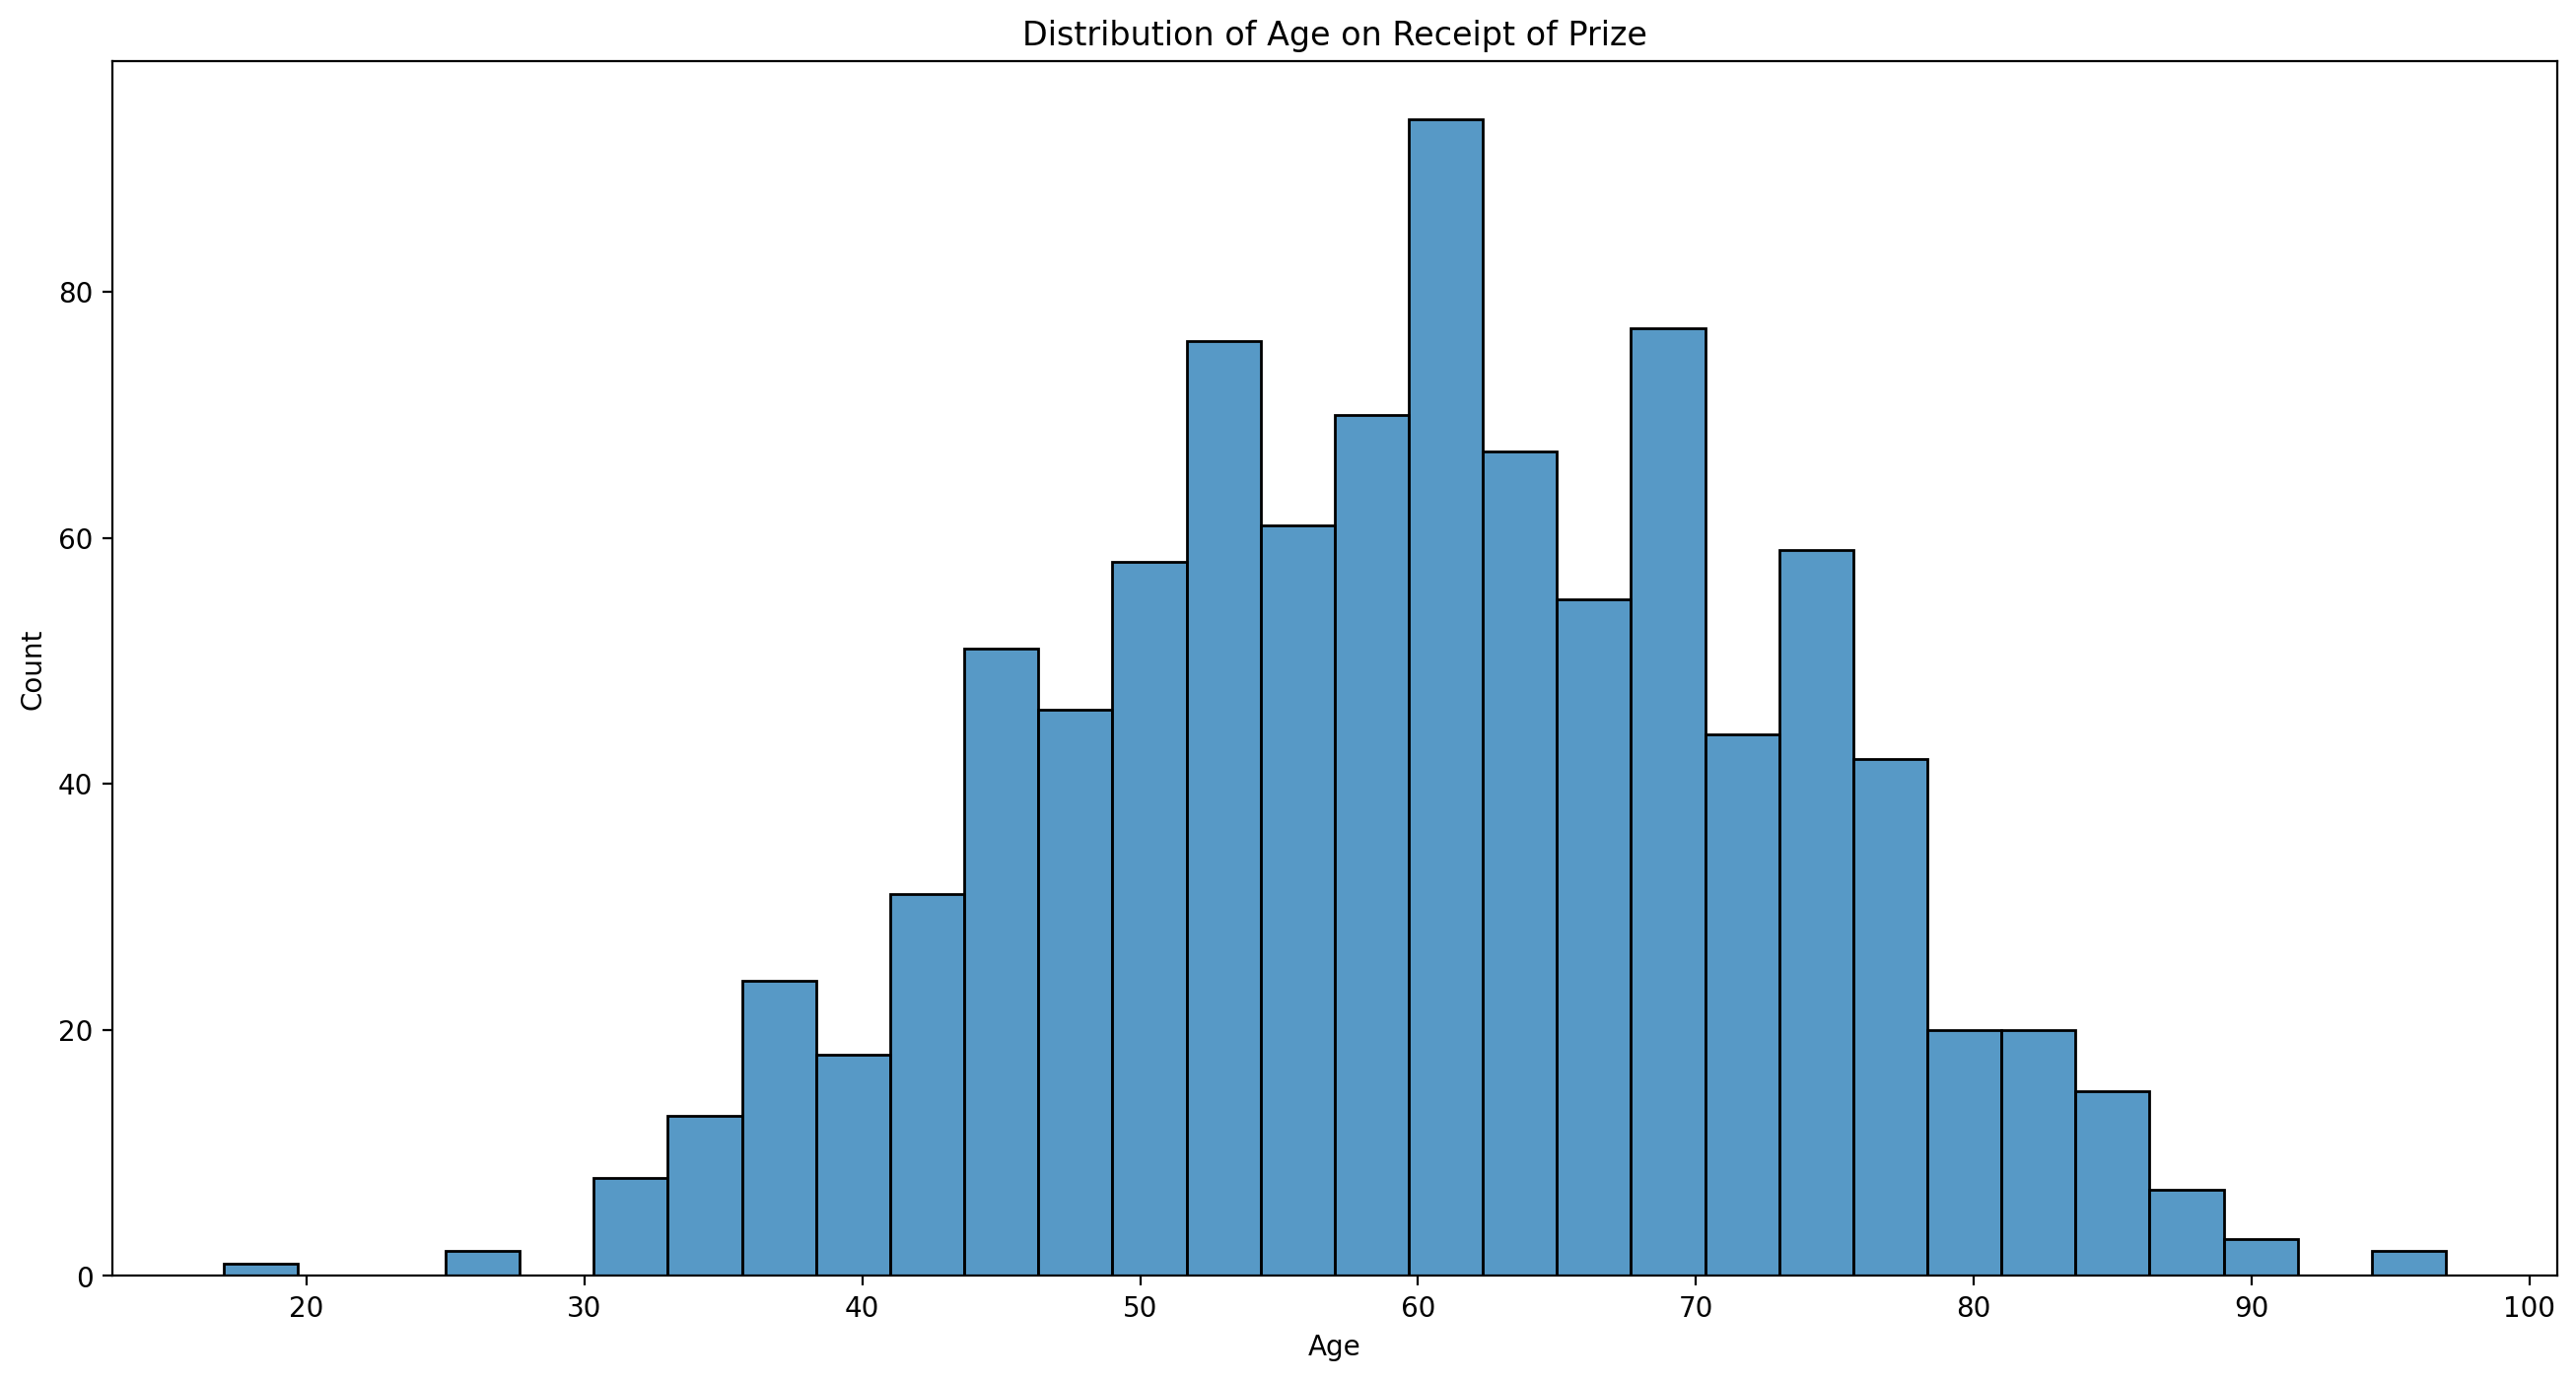

In [71]:
# Visualizing the laureate age at the time on winning on a Histogram using Seaborn

plt.figure(figsize=(16, 8), dpi=200)

sns.histplot(data=df_data.winning_age, bins=30)

plt.xlabel('Age')
plt.title('Distribution of Age on Receipt of Prize')

plt.show()

### Descriptive Statistics for the Laureate Age at Time of Award

* Calculate the descriptive statistics for the age at the time of the award. 
* Then visualise the distribution in the form of a histogram using [Seaborn's .histplot() function](https://seaborn.pydata.org/generated/seaborn.histplot.html).
* Experiment with the `bin` size. Try 10, 20, 30, and 50.  

In [72]:
df_data.winning_age.describe()

count   964.00
mean     59.93
std      12.68
min      17.00
25%      51.00
50%      60.00
75%      69.00
max      97.00
Name: winning_age, dtype: float64

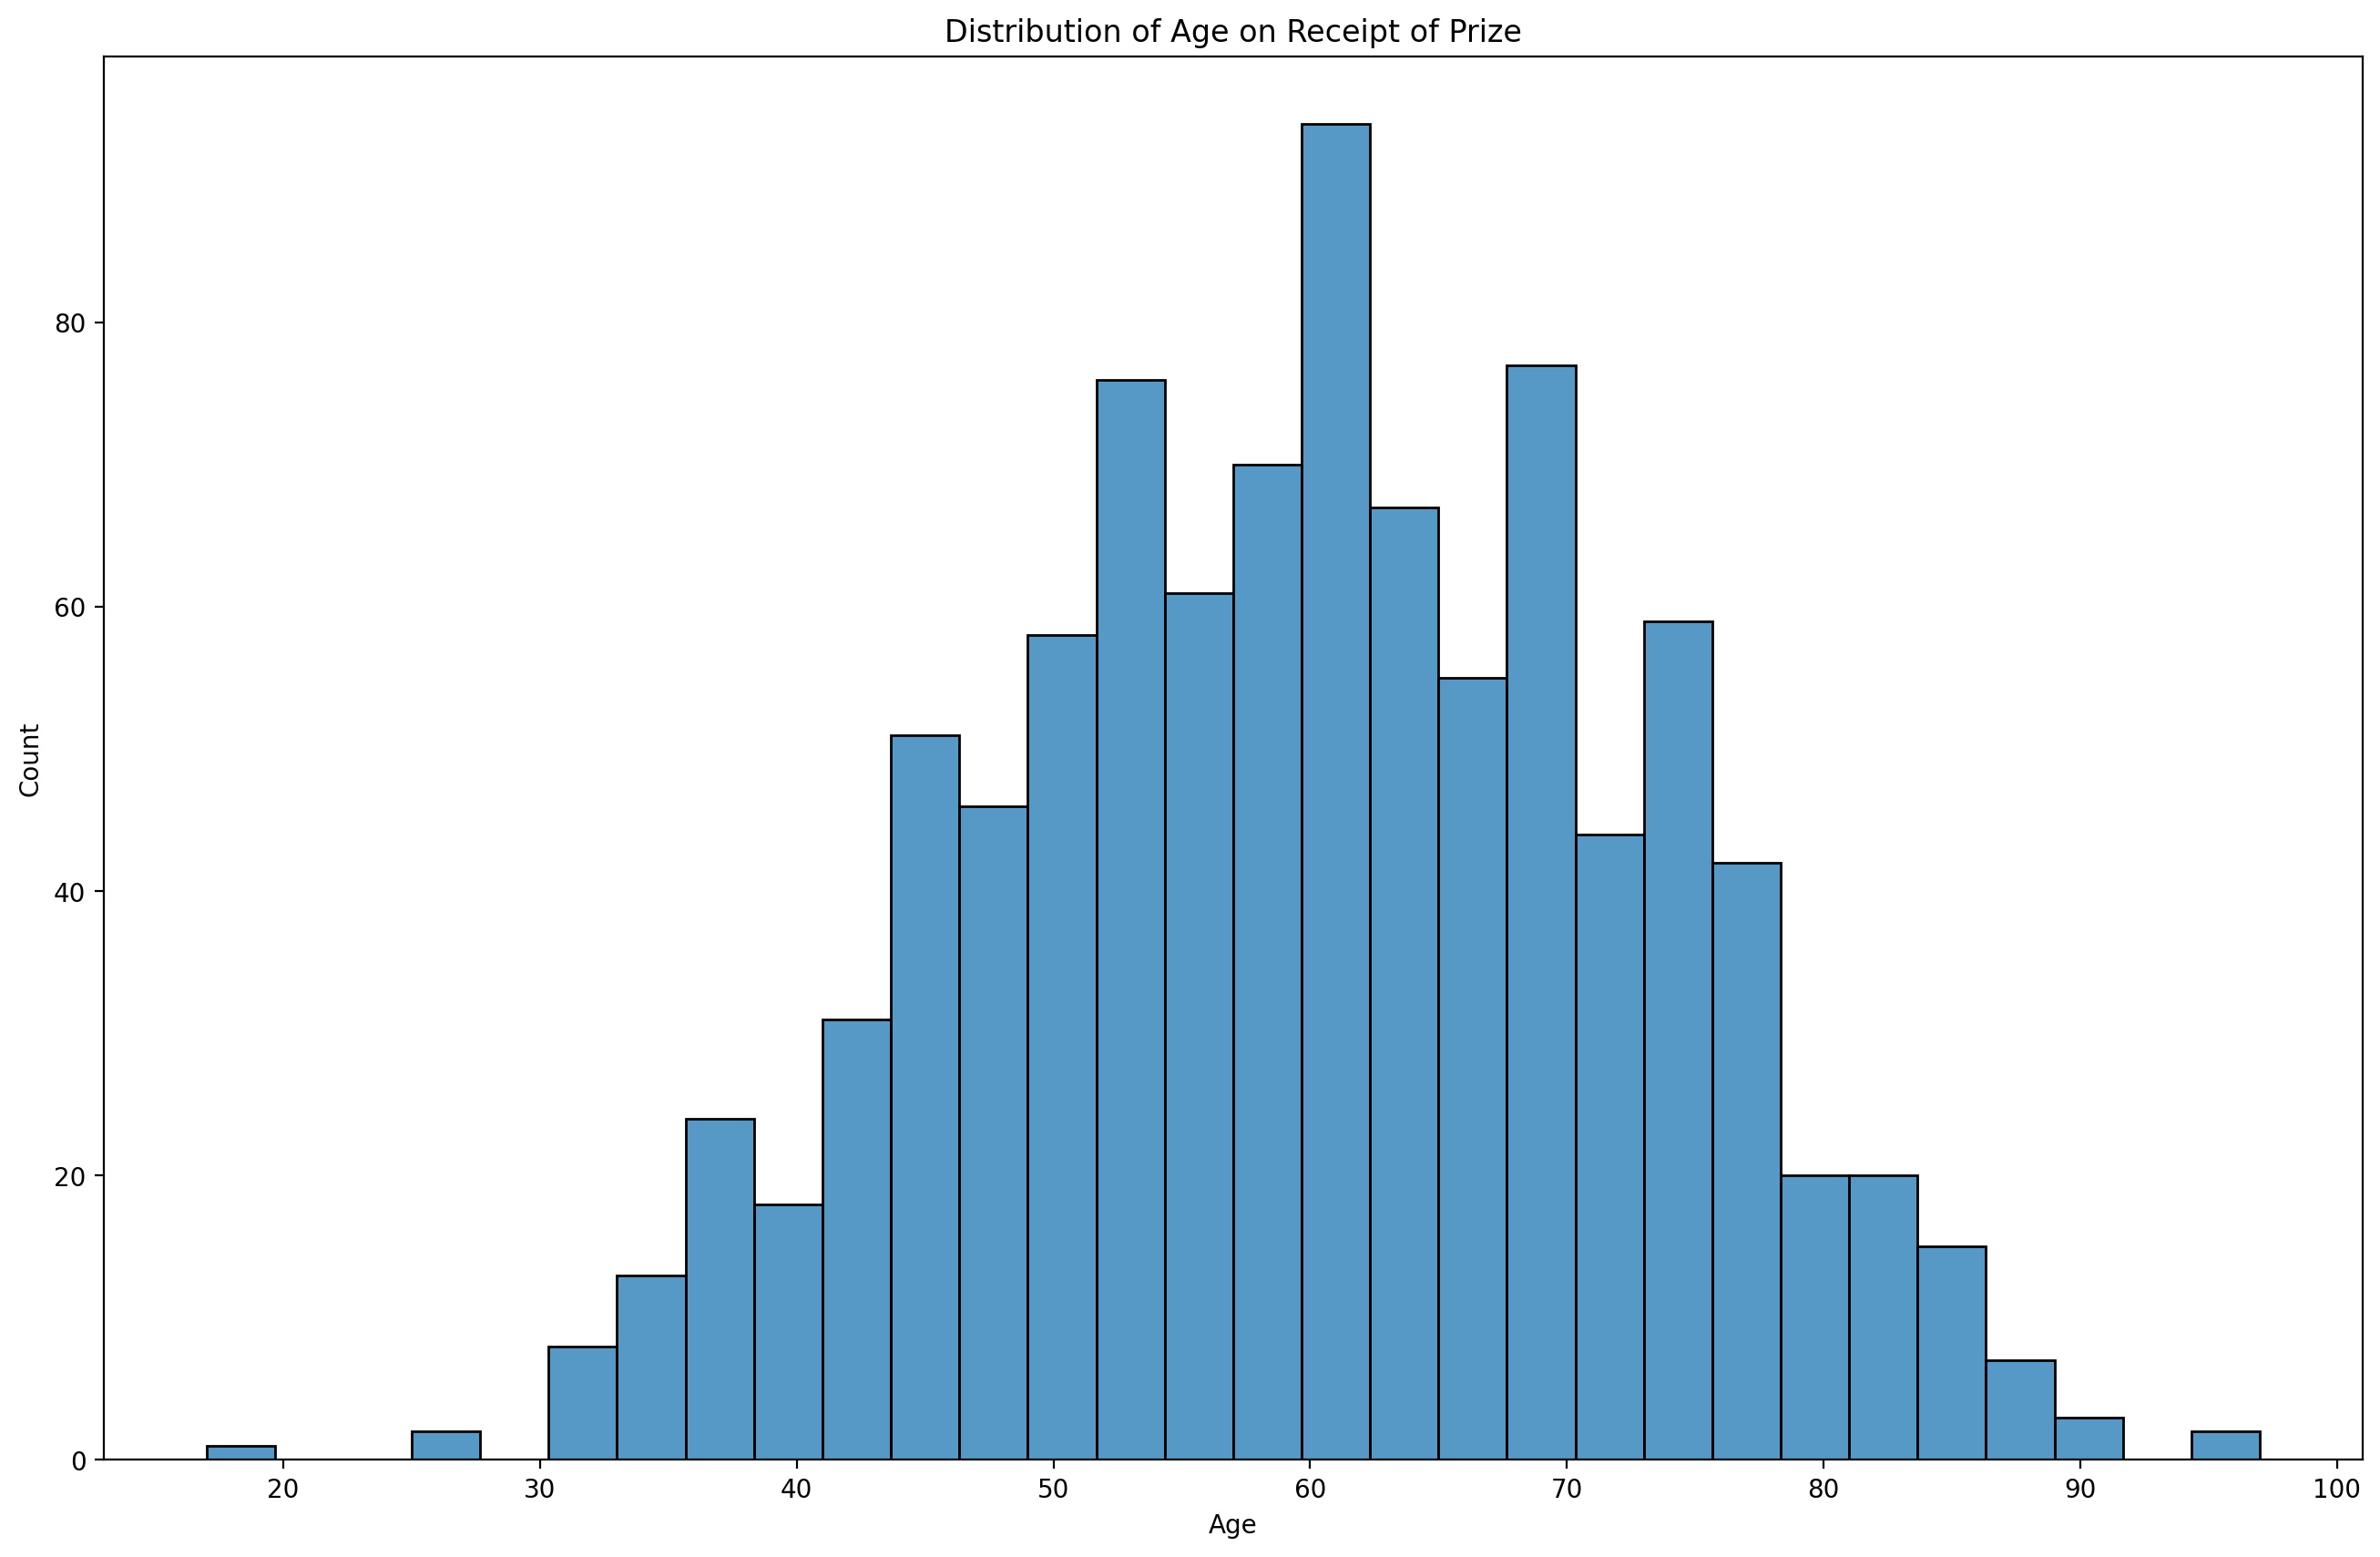

In [73]:
plt.figure(figsize=(16, 10), dpi=200)

sns.histplot(df_data.winning_age, bins=30)

plt.xlabel('Age')
plt.title('Distribution of Age on Receipt of Prize')

plt.show()

### Age at Time of Award throughout History

Are Nobel laureates being nominated later in life than before? Have the ages of laureates at the time of the award increased or decreased over time?

**Challenge**

* Use Seaborn to [create a .regplot](https://seaborn.pydata.org/generated/seaborn.regplot.html?highlight=regplot#seaborn.regplot) with a trendline.
* Set the `lowess` parameter to `True` to show a moving average of the linear fit.
* According to the best fit line, how old were Nobel laureates in the years 1900-1940 when they were awarded the prize?
* According to the best fit line, what age would it predict for a Nobel laureate in 2020?


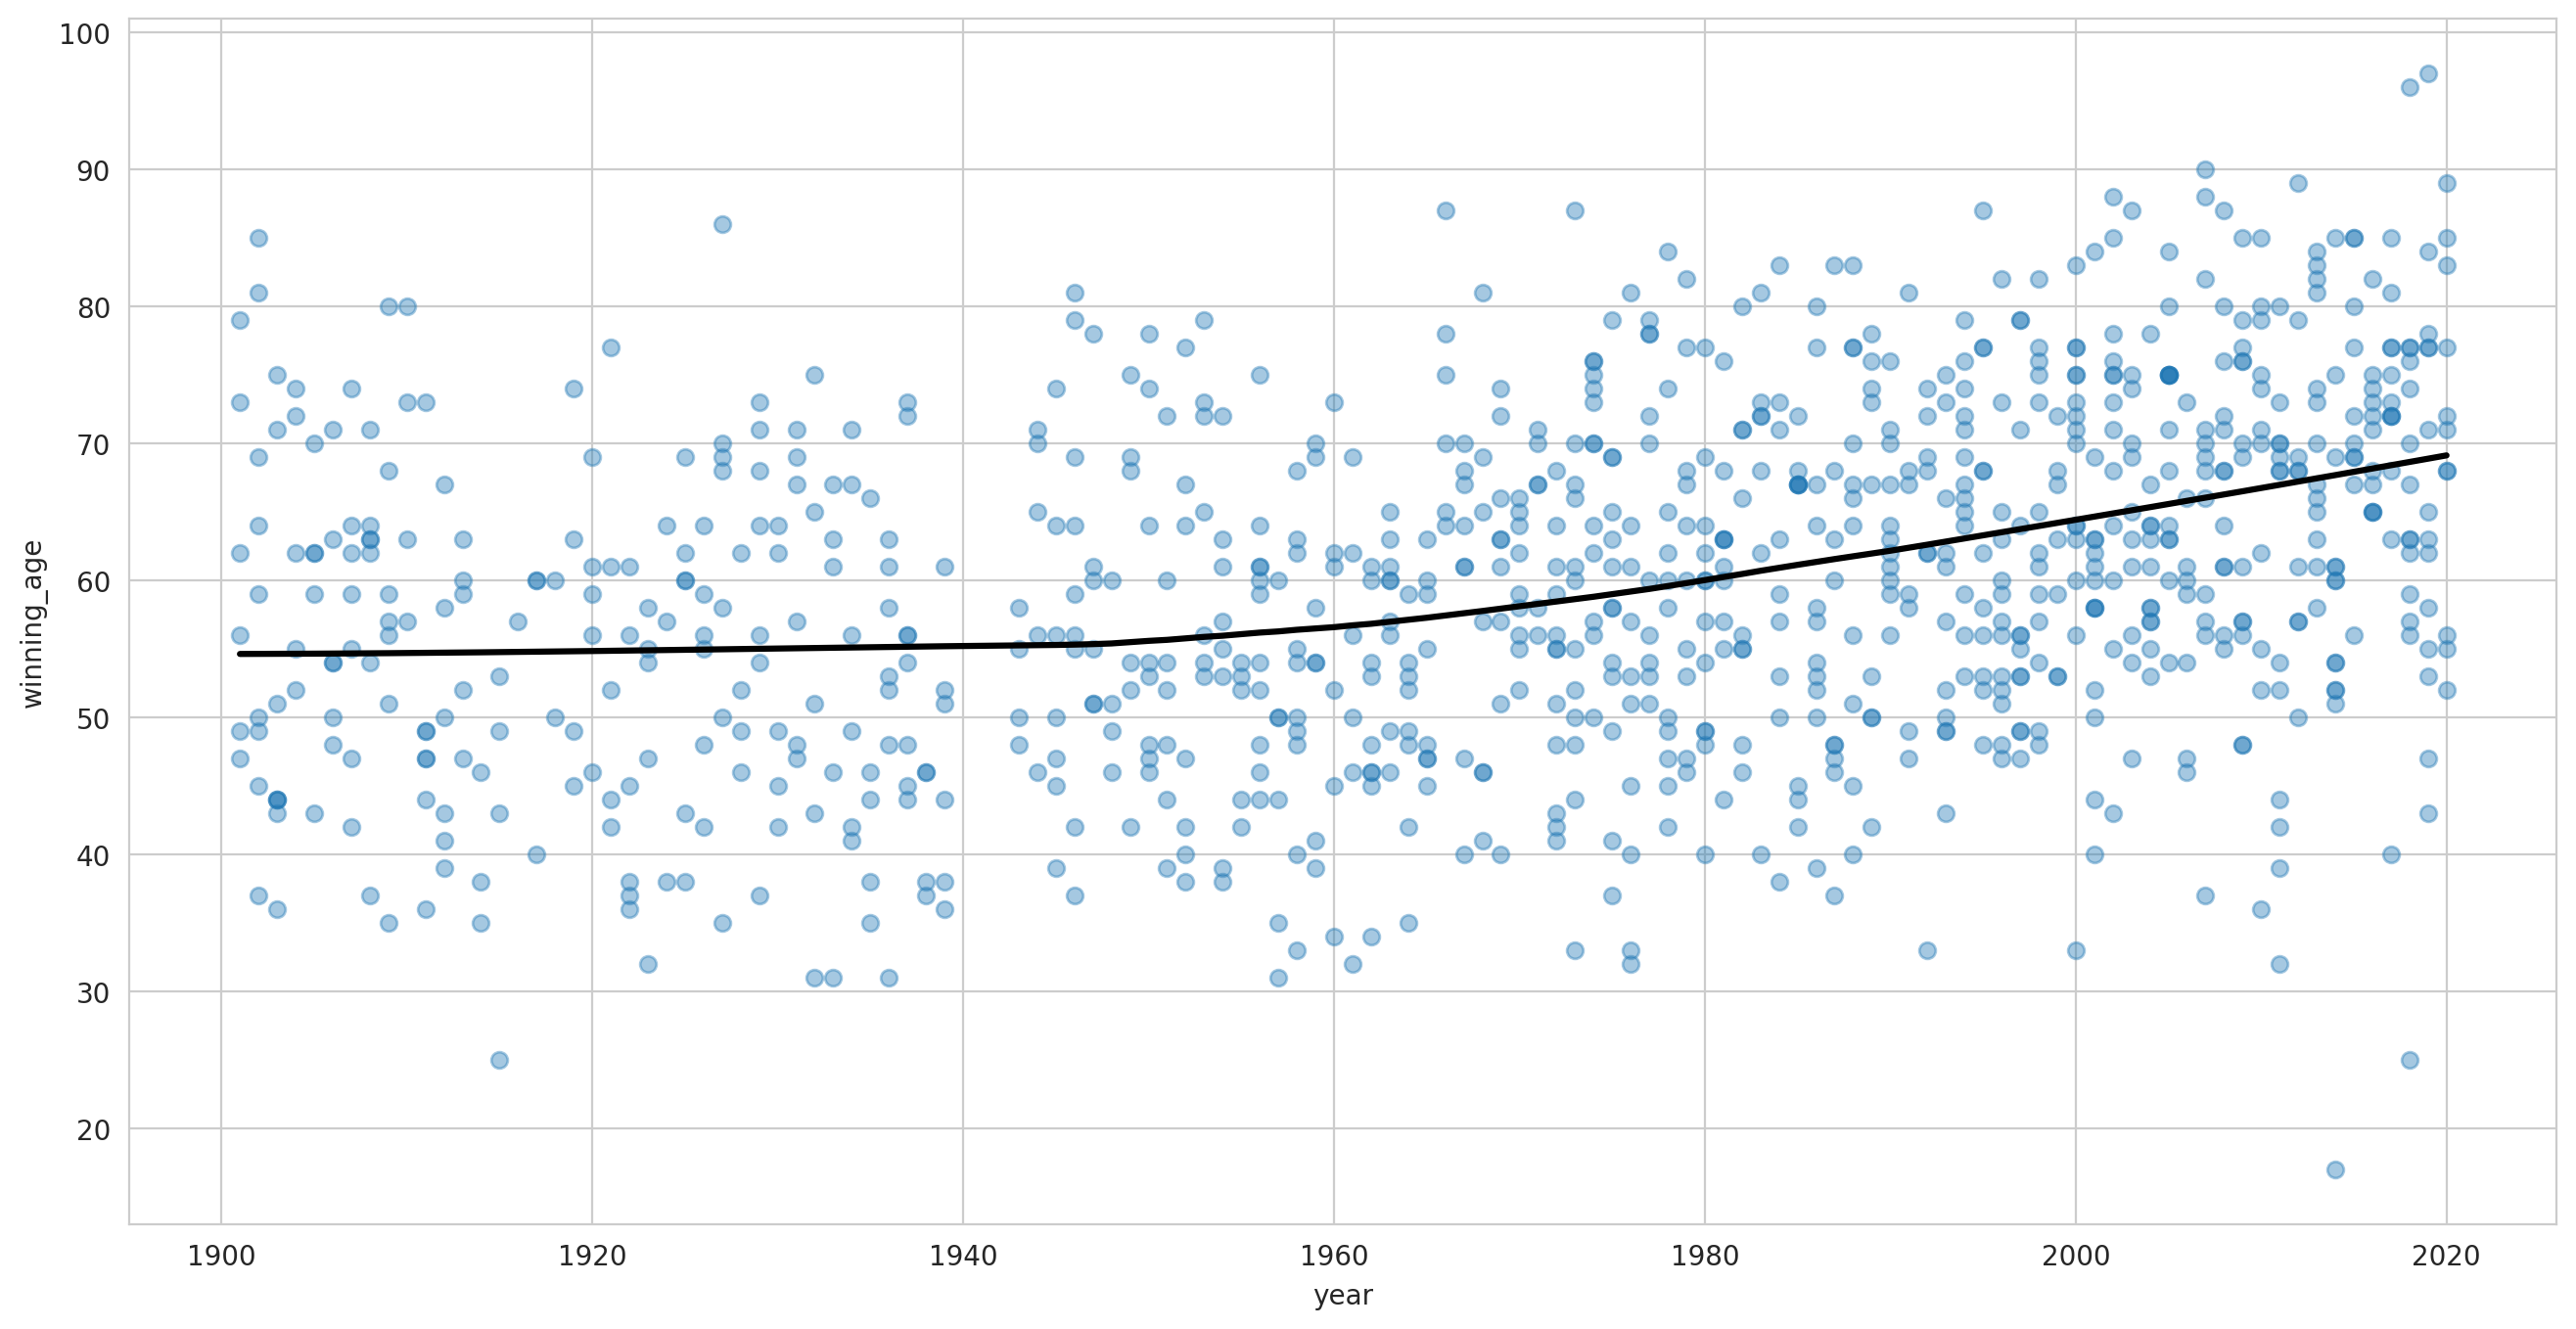

In [74]:
plt.figure(figsize=(16, 8), dpi=200)

with sns.axes_style("whitegrid"):
    sns.regplot(data=df_data,
               y='winning_age',
               x='year',
               lowess=True,
               scatter_kws={'alpha': 0.4},
                line_kws={'color': 'black'})

plt.show()

### Winning Age Across the Nobel Prize Categories

How does the age of laureates vary by category? 

* Use Seaborn's [`.boxplot()`](https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot) to show how the mean, quartiles, max, and minimum values vary across categories. Which category has the longest "whiskers"? 
* In which prize category are the average winners the oldest?
* In which prize category are the average winners the youngest?

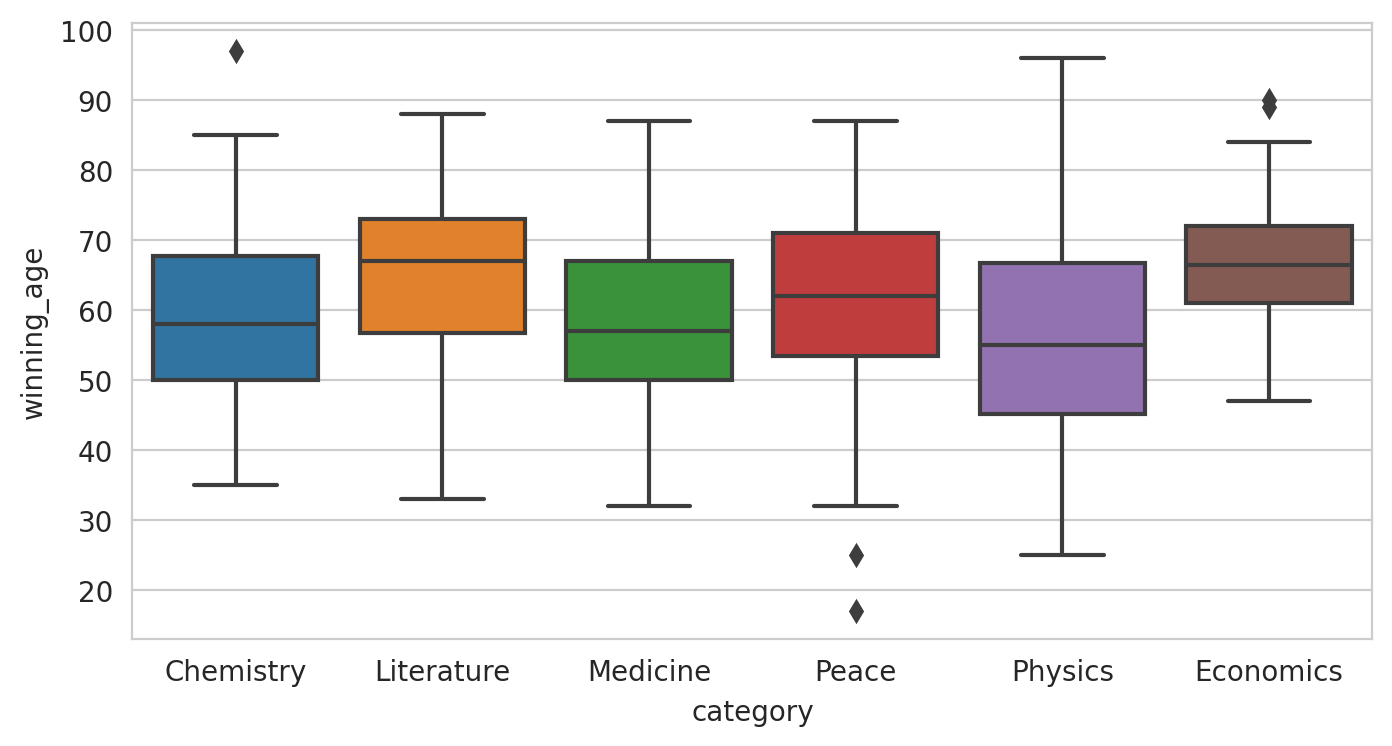

In [75]:
plt.figure(figsize=(8, 4), dpi=200)

with sns.axes_style("whitegrid"):
    sns.boxplot(data=df_data,
               x='category',
               y='winning_age')

plt.show()

In [93]:
# getting the above graph in pandas

df_data.groupby('category').agg({'winning_age': 
                                 ['mean', 'max', 'min', 'quantile']})

winning_age                     
                  mean   max   min quantile
category                                   
Chemistry        58.80 97.00 35.00    58.00
Economics        66.61 90.00 47.00    66.50
Literature       64.67 88.00 33.00    67.00
Medicine         58.64 87.00 32.00    57.00
Peace            60.73 87.00 17.00    62.00
Physics          56.62 96.00 25.00    55.00

**Challenge**
* Now use Seaborn's [`.lmplot()`](https://seaborn.pydata.org/generated/seaborn.lmplot.html?highlight=lmplot#seaborn.lmplot) and the `row` parameter to create 6 separate charts for each prize category. Again set `lowess` to `True`.
* What are the winning age trends in each category? 
* Which category has the age trending up and which category has the age trending down? 
* Is this `.lmplot()` telling a different story from the `.boxplot()`?
* Create another chart with Seaborn. This time use `.lmplot()` to put all 6 categories on the same chart using the `hue` parameter. 


/home/victornice/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



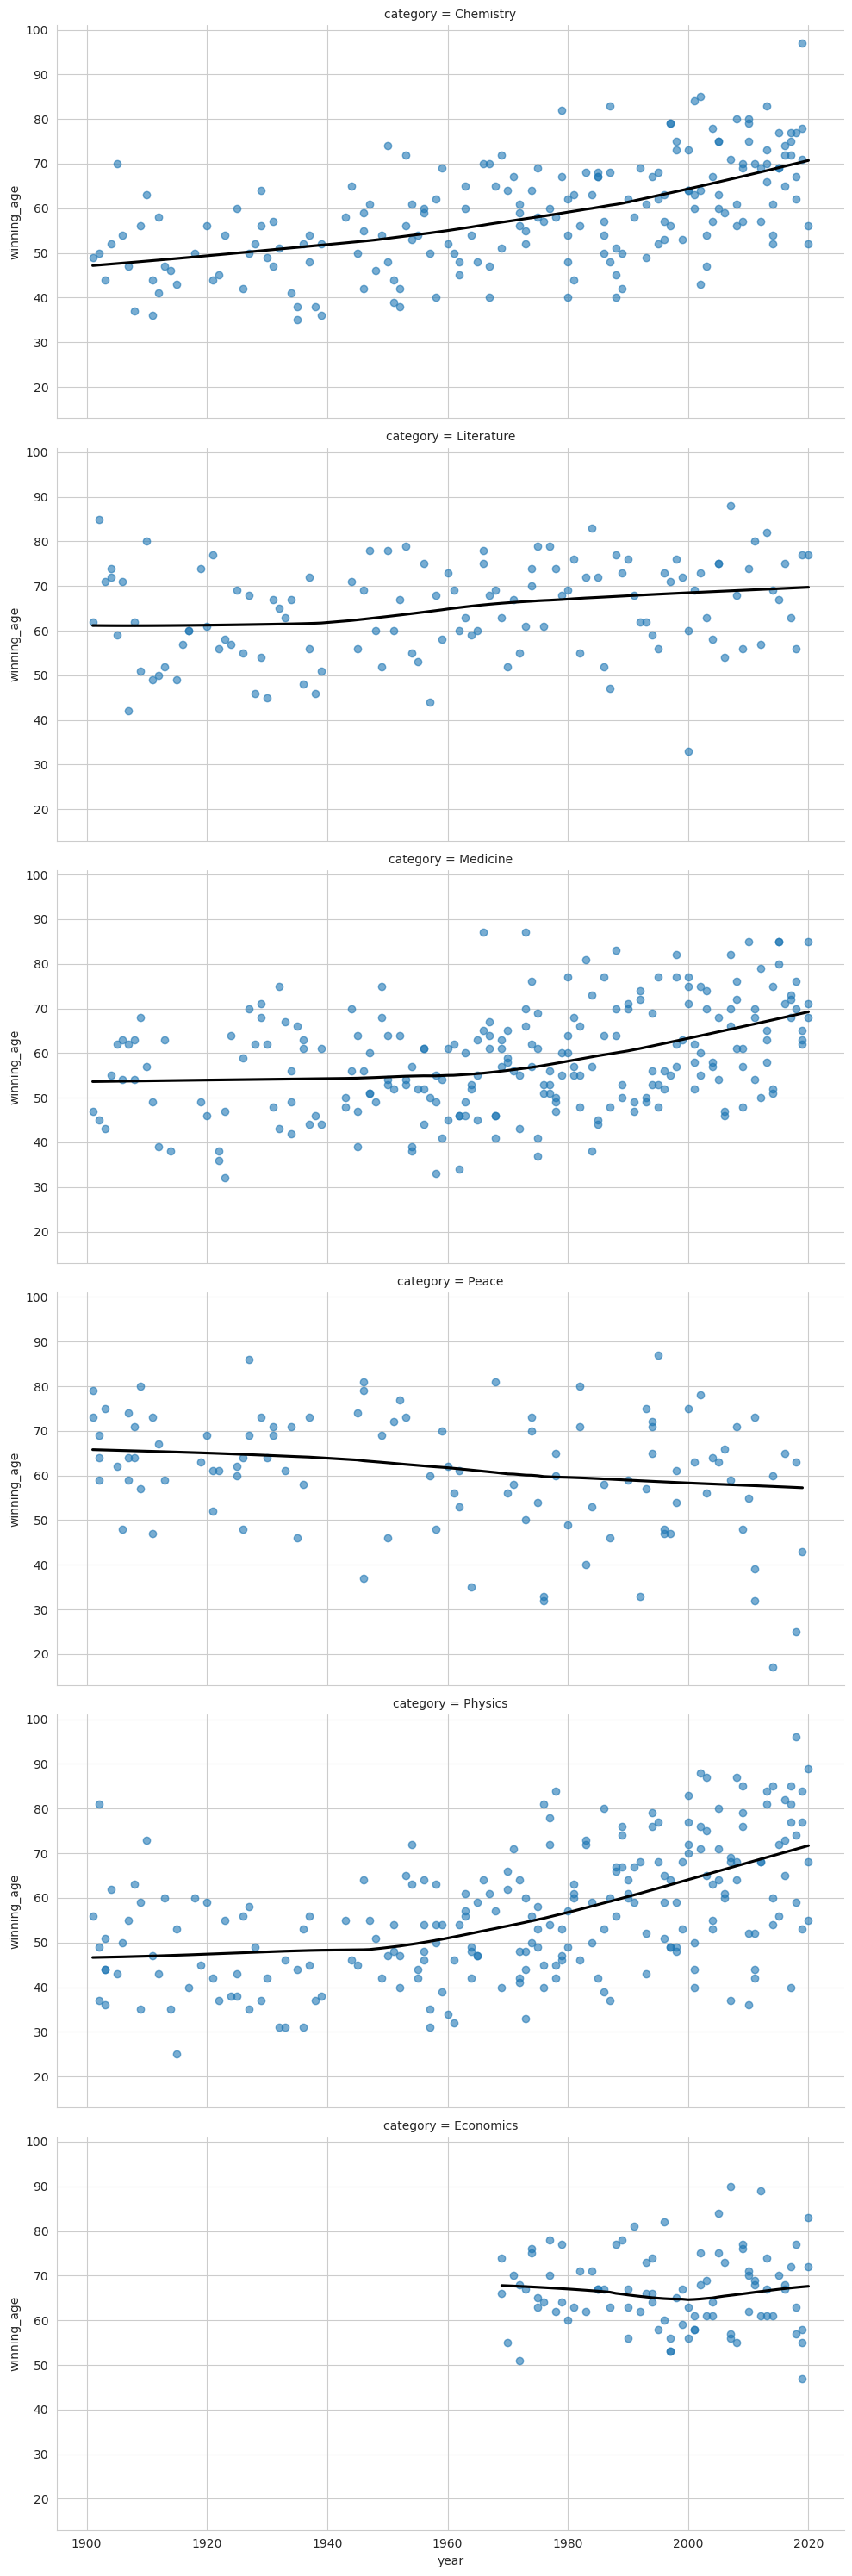

In [97]:
# plt.figure(figsize=(16, 8), dpi=200)

with sns.axes_style('whitegrid'):
    sns.lmplot(data=df_data,
               x='year', 
               y='winning_age',
               row = 'category',
               lowess=True, 
               aspect=2,
               scatter_kws = {'alpha': 0.6},
               line_kws = {'color': 'black'},)
 
plt.show()

/home/victornice/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



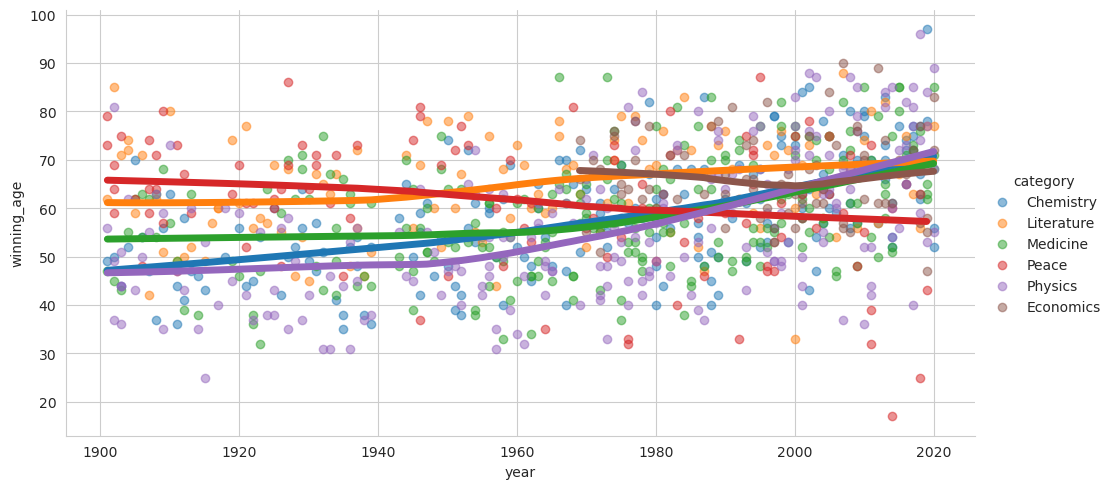

In [99]:
# combining all the charts

with sns.axes_style("whitegrid"):
    sns.lmplot(data=df_data,
               x='year',
               y='winning_age',
               hue='category',
               lowess=True, 
               aspect=2,
               scatter_kws={'alpha': 0.5},
               line_kws={'linewidth': 5})
 
plt.show()
